In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/converted-file/converted_file.csv


In [110]:
df = pd.read_csv('/kaggle/input/converted-file/converted_file.csv')

In [111]:
# Tüm sütunların görünmesini sağla
pd.set_option('display.max_columns', None)

df.head(10)

,listingId,realtyId,no,title,description,price,currency,currencyId,startDate,endDate,images,district,county,residence,room,livingRoom,bathRoom,isMapHidden,createdDate,updatedDate,listingUpdatedDate,age,heating,fuel,build,buildState,land,usage,credit,deposit,barter,landRegisterName,authorizedRealtor,furnished,detailUrl,firm,firmUser,subCategory,attributes,mainCategory,fee,sides,onlineVisit,hasBranded,hasUpdateBooster,registerState,lat,lon,netSqm,grossSqm,buildState_name,is_amount_zero,linkedSubcategoryUrl,katBilgisi,toplamKatSayisi,roomAndLivingRoom
0,78883-704,43672903,704,ÇİFTÇİ EMLAK 'tan BİLGE HAST. YANI ARA KAT ANA...,"<h2 style=\""text-align: center;\""><strong styl...",2500000.0,TL,1,2025-02-07,2025-05-08,"[""ds01/3/0/9/2/7/6/3/4/926b09a1-1a3e-4488-b8d2...",Kurtuluş,Adapazarı,Daire,3,1,1,0,2024-11-08T10:10:32.780+0000,2025-02-07T07:33:35.410Z,2024-11-08T10:10:32.780Z,30.0,Kombi,Doğalgaz,Betonarme,İkinci El,"{""municipality"":null,""island"":""225"",""parcel"":""...",Boş,Uygun,"{""amount"":0,""currencyCode"":""TL""}",Yapılmaz,Kat Mülkiyeti,DOĞRU,YANLIŞ,https://www.hepsiemlak.com/sakarya-adapazari-k...,ÇİFTÇİ EMLAK,Erdem ÇİFTÇİ,Daire,"{""inAttributes"":[{""id"":1,""name"":""ADSL""},{""id"":...",Konut,200 TL,K-G,1,0,YANLIŞ,Kat Mülkiyeti,40.78,30.40,110,122,İkinci El,DOĞRU,daire,2,4,3+1
1,54537-3457,42399668,3457,SAKARYA KARASU'DA YAZLIK DAİRENİZ EMRE FİLİZFİ...,"<p style=\""text-align: center;\""><br></p>\n<p ...",1500000.0,TL,1,2025-01-10,2025-04-13,"[""ds01/8/6/6/9/9/3/2/4/7a1de059-f7eb-4976-a938...",Yalı,Karasu,Daire,2,1,1,0,2024-03-23T02:16:07.357+0000,2025-01-13T08:24:27.637Z,2025-01-13T08:24:27.627Z,0.0,Kombi,Doğalgaz,Betonarme,İkinci El,"{""municipality"":null,""island"":null,""parcel"":null}",Boş,Uygun,"{""amount"":0,""currencyCode"":""TL""}",Yapılır,Kat Mülkiyeti,YANLIŞ,YANLIŞ,https://www.hepsiemlak.com/sakarya-karasu-yali...,EMRE FİLİZFİDANOĞLU İNŞAAT,EMRE FİLİZFİDANOĞLU,Daire,"{""inAttributes"":[{""id"":1,""name"":""ADSL""},{""id"":...",Konut,0,K-G-D-B,0,1,YANLIŞ,Kat Mülkiyeti,41.11,30.69,75,80,NaN,DOĞRU,daire,2,3,2+1
2,116181-160,40773651,160,"Sapanca,Kırkpınar’da Satılık 4+1 Villa",<p>https://app.immoviewer.com/portal/tour/2907...,19500000.0,TL,1,2025-02-05,2025-05-06,"[""ds01/1/5/6/3/7/7/0/4/1683795523-457676-40773...",Kırkpınar Soğuksu,Sapanca,Villa,4,1,2,0,2023-05-11T08:56:04.663+0000,2025-02-05T06:56:17.940Z,2023-09-21T11:57:27.217Z,10.0,Kombi,Doğalgaz,Betonarme,İkinci El,"{""municipality"":null,""island"":null,""parcel"":null}",Boş,Uygun,"{""amount"":0,""currencyCode"":""TL""}",Yapılmaz,Kat Mülkiyeti,DOĞRU,YANLIŞ,https://www.hepsiemlak.com/sakarya-sapanca-kir...,İLKAY SORUCU / WEN GAYRİMENKUL,İLKAY SORUCU,Villa,"{""inAttributes"":[{""id"":16,""name"":""Balkon""},{""i...",Konut,1000 TL,NaN,1,0,YANLIŞ,Kat Mülkiyeti,40.70,30.21,200,250,İkinci El,DOĞRU,villa,2,2,4+1
3,18262-757,42174714,757,EMSALSİZ PROJE KARASU MERKEZDE HAVUZLU LÜKS 3+...,"<p><br></p>\n<p style=\""text-align: center;\"">...",3350000.0,TL,1,2025-02-12,2025-05-13,"[""ds01/4/1/7/4/7/1/2/4/de21c2b3-96f6-40a4-b4df...",Kabakoz,Karasu,Daire,3,1,1,0,2024-02-08T12:37:36.627+0000,2025-02-12T13:02:20.197Z,2025-02-12T13:02:20.187Z,0.0,Kombi,Doğalgaz,Betonarme,Sıfır,"{""municipality"":null,""island"":null,""parcel"":null}",Boş,Uygun,"{""amount"":0,""currencyCode"":""TL""}",Yapılır,Kat İrtifakı,DOĞRU,YANLIŞ,https://www.hepsiemlak.com/sakarya-karasu-kaba...,KIROĞLU EMLAK,CAN BERK KIR,Daire,"{""inAttributes"":[],""outAttributes"":[],""locatio...",Konut,0,NaN,1,1,YANLIŞ,Kat İrtifakı,41.10,30.68,120,130,Sıfır,DOĞRU,daire,3,3,3+1
4,131612-1792,44126172,1792,"3+1 MERKEZİ KONUMDA , BAHÇELİ , DENİZE YAKIN S...",<p><strong>SATILIK OLAN VİLLA İSTANBUL'A 2 SAA...,3700000.0,TL,1,2025-02-01,2025-05-02,"[""ds01/2/7/1/6/2/1/4/4/cf2bbd94-1da8-4fc7-9b08...",Yayla,Kocaali,Villa,3,1,3,0,2025-02-01T09:05:23.047+0000,2025-02-01T09:11:19.287Z,2025-02-01T09:05:23.047Z,0.0,Kombi,Doğalgaz,Betonarme,Sıfır,"{""municipality"":null,""island"":"""",""parcel"":""""}",Boş,Uygun,"{""amoun

In [112]:
columns_to_drop = [
    'listingId', 'realtyId', 'no', 'currency', 'currencyId',
    'startDate', 'endDate', 'images', 'isMapHidden',
    'createdDate', 'updatedDate', 'listingUpdatedDate',
    'deposit', 'detailUrl', 'firm', 'firmUser', 'attributes','buildState_name','title','description','land'
    ,'linkedSubcategoryUrl','hasBranded','hasUpdateBooster'
    ,'subCategory','roomAndLivingRoom'
]

df.drop(columns=columns_to_drop, inplace=True)


In [113]:
# fee sütununu float türüne dönüştür

# Sütunun metin dizisi olduğundan emin ol
df['fee'] = df['fee'].astype(str)

# "TL", "TRY" ve boşlukları kaldır, ardından tam sayıya dönüştür
df['fee'] = (
    df['fee']
    .str.replace('TL', '', regex=False)
    .str.replace('TRY', '', regex=False)
    .str.replace(',', '.', regex=False)  # Ondalık virgül varsa
    .str.strip()
    .astype(float)
)

In [114]:
print("dataSet boyutu:", df.shape)

# Tüm sütunların görünmesini sağla
pd.set_option('display.max_columns', None)

df.head(10)

dataSet boyutu: (2160, 30)


,price,district,county,residence,room,livingRoom,bathRoom,age,heating,fuel,build,buildState,usage,credit,barter,landRegisterName,authorizedRealtor,furnished,mainCategory,fee,sides,onlineVisit,registerState,lat,lon,netSqm,grossSqm,is_amount_zero,katBilgisi,toplamKatSayisi
0,2500000.0,Kurtuluş,Adapazarı,Daire,3,1,1,30.0,Kombi,Doğalgaz,Betonarme,İkinci El,Boş,Uygun,Yapılmaz,Kat Mülkiyeti,DOĞRU,YANLIŞ,Konut,200.0,K-G,1,Kat Mülkiyeti,40.78,30.40,110,122,DOĞRU,2,4
1,1500000.0,Yalı,Karasu,Daire,2,1,1,0.0,Kombi,Doğalgaz,Betonarme,İkinci El,Boş,Uygun,Yapılır,Kat Mülkiyeti,YANLIŞ,YANLIŞ,Konut,0.0,K-G-D-B,0,Kat Mülkiyeti,41.11,30.69,75,80,DOĞRU,2,3
2,19500000.0,Kırkpınar Soğuksu,Sapanca,Villa,4,1,2,10.0,Kombi,Doğalgaz,Betonarme,İkinci El,Boş,Uygun,Yapılmaz,Kat Mülkiyeti,DOĞRU,YANLIŞ,Konut,1000.0,NaN,1,Kat Mülkiyeti,40.70,30.21,200,250,DOĞRU,2,2
3,3350000.0,Kabakoz,Karasu,Daire,3,1,1,0.0,Kombi,Doğalgaz,Betonarme,Sıfır,Boş,Uygun,Yapılır,Kat İrtifakı,DOĞRU,YANLIŞ,Konut,0.0,NaN,1,Kat İrtifakı,41.10,30.68,120,130,DOĞRU,3,3
4,3700000.0,Yayla,Kocaali,Villa,3,1,3,0.0,Kombi,Doğalgaz,Betonarme,Sıfır,Boş,Uygun,Yapılır,Kat Mülkiyeti,DOĞRU,YANLIŞ,Konut,0.0,G-D-B,1,Kat Mülkiyeti,41.07,30.86,140,160,DOĞRU,2,3
5,2150000.0,Yeni,Karasu,Daire,2,1,1,7.0,Kombi,Doğalgaz,Betonarme,Sıfır,Boş,Uygun,Yapılır,Kat Mülkiyeti,DOĞRU,YANLIŞ,Konut,1.0,K-G-D-B,1,Kat Mülkiyeti,41.12,30.66,90,95,DOĞRU,2,3
6,21000000.0,Göl,Sapanca,Müstakil Ev,6,1,6,5.0,Kombi,Doğalgaz,Betonarme,İkinci El,Boş,Uygun,Yapılmaz,Kat Mülkiyeti,DOĞRU,DOĞRU,Konut,1.0,G-D-B,1,Kat Mülkiyeti,40.69,30.29,300,920,DOĞRU,2,2
7,1600000.0,İstiklal,Serdivan,Daire,1,1,1,5.0,Merkezi,Doğalgaz,Betonarme,İkinci El,Boş,Uygun,Yapılmaz,Kat Mülkiyeti,DOĞRU,DOĞRU,Konut,500.0,G,0,Kat Mülkiyeti,40.77,30.36,25,32,DOĞRU,3,3
8,5250000.0,Yalı,Karasu,Villa,3,1,1,0.0,Yerden Isıtma,Doğalgaz,Betonarme,Sıfır,Boş,Uygun,Yapılmaz,Kat Mülkiyeti,DOĞRU,YANLIŞ,Konut,0.0,G-B,0,Kat Mülkiyeti,41.10,30.71,125,130,DOĞRU,2,3
9,4100000.0,Alandere,Kocaali,Villa,3,1,2,5.0,Yerden Isıtma,Doğalgaz,Betonarme,İkinci El,Boş,Uygun,Yapılır,Kat İrtifakı,DOĞRU,YANLIŞ,Konut,0.0,K,1,Kat İrtifakı,41.07,30.89,135,150,DOĞRU,2,3


In [115]:

# Adım 1: Kategorik sütunları belirle (object veya bool)
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Adım 2: Her kategorik sütun için benzersiz değerleri yazdır
for col in categorical_columns:
    unique_vals = df[col].dropna().unique()
    print(f"\n Sütun: {col}")
    print(f" Benzersiz değer sayısı: {len(unique_vals)}")
    print(f" Değerler:\n{unique_vals}")


 Sütun: district
 Benzersiz değer sayısı: 219
 Değerler:
['Kurtuluş' 'Yalı' 'Kırkpınar Soğuksu' 'Kabakoz' 'Yayla' 'Yeni' 'Göl'
 'İstiklal' 'Alandere' 'Ceylandere' 'Aziziye' 'Yazlık'
 'Kuzuluk Topçusırtı' 'Şeyhler' 'Papuççular' 'Vatan' 'Hacımercan'
 'Tekeler' 'Karapınar' 'Turnadere' 'Kirazlı' 'Kemalpaşa' 'Rüstempasa'
 'Güldibi' 'Rasimpaşa' 'İncilli' 'Karaosman' 'Mahmudiye' 'Selahiye'
 'Karasu' 'Arabacıalanı' 'Gazipaşa' 'Ömercikler' 'Kalburcu' 'Elperek'
 'Tuzla' 'Fatih' 'Karaman' 'İlmiye' 'Korucuk' 'Akıncılar' 'Alifuatpaşa'
 'Kurudil' 'Çınardibi' '15 Temmuz Camili' 'Başoğlu' 'Maltepe'
 'Kurtköy Dibektaş' 'Köprübaşı' 'Bakacak' 'Arifbey' 'Otuziki Evler'
 'Gümüşoluk' 'Yağcılar' 'Mecidiye' 'Dereboğazı' 'Neviye' 'Başpınar'
 'Cumhuriyet' 'Yenidoğan' 'Beşköprü' 'Şükriye' 'İnciksuyu' 'Bağlar'
 'Çayiçi' 'Adatepe' 'Gündoğan' 'Merkez' 'Dilmen' 'Yali' 'Tığcılar'
 'Aşağı Kirazca' 'Küçük Söğütlü' 'Erenler' 'Gazi Süleyman Paşa' 'Konak'
 'Kuruçeşme' 'Yahyalar' 'Küpçüler' 'Kadıköy' 'Ahılar' 'Yukarıderek

In [116]:
# Bölge sütunu için

# Yazım hatalarını ve kodlama sorunlarını düzeltmek için sözlük
district_correction_map = {
    'Yali': 'Yalı',
    'Mithatpasa': 'Mithatpaşa',
    'Gazipasa': 'Gazipaşa',
    'Kemalpasa': 'Kemalpaşa',
    'GüneşlerMerkez': 'Güneşler Merkez',
    'Bah�elievler': 'Bahçelievler',
    'G�nesler Yeni': 'Güneşler Yeni',
    'In�n�': 'İnönü',
    'Baglar': 'Bağlar',
    'OtuzikiEvler': 'Otuziki Evler',
    'Camicedit': 'Cami Cedit',
    'Besk�pr�': 'Beşköprü',
    '�nl�ce': 'Ünlüce',
    'Yagcilar': 'Yağcılar',
    'Mithatpasa': 'Mithatpaşa',
    'Bah�elievler': 'Bahçelievler',
}
# 'district' sütunundaki değerleri düzelt
df['district'] = df['district'].replace(district_correction_map)

district_correction_map = {
    'KırkpınarSoğuksu': 'Kırkpınar Soğuksu',
    'Mithatpasa': 'Mithatpaşa',
    'Gazipasa': 'Gazipaşa',
    'Kemalpasa': 'Kemalpaşa',
    'OtuzikiEvler': 'Otuziki Evler',
    'Baglar': 'Bağlar',
    'Inonu': 'İnönü',
    'Camicedit': 'Cami Cedit',
    'Yali': 'Yalı',
    'Gunesler Merkez': 'Güneşler Merkez',
    'Gunesler Yeni': 'Güneşler Yeni',
    'GüneşlerMerkez': 'Güneşler Merkez',
    'GüneşlerYeni': 'Güneşler Yeni'
}

# district sütununa düzeltmeleri uygula
df['district'] = df['district'].replace(district_correction_map)

In [117]:
# İlçe sütunu için
# 'county' sütunundaki hataları düzeltmek için sözlük
county_correction_map = {
    'Adapazari': 'Adapazarı',
    'Akyazi': 'Akyazı',
    'Karap�r�ek': 'Karapürçek'
}

# Düzeltmeyi uygula
df['county'] = df['county'].replace(county_correction_map)

In [118]:
# Kategorik sütunlar için düzeltme sözlüğü
correction_maps = {
    'residence': {
        'M�stakil Ev': 'Müstakil Ev',
        'MüstakilEv': 'Müstakil Ev',
        'Apartment': 'Daire',
        'Seaside&Summer House': 'Yazlık',
        'Detached House': 'Müstakil Ev'
    },
    'heating': {
        'Yerden Isitma': 'Yerden Isıtma',
        'YerdenIsıtma': 'Yerden Isıtma',
        'Yerden Is�tma': 'Yerden Isıtma',
        'DoğalgazSobası': 'Doğalgaz Sobası',
        'Merkezi (PayÖlçer)': 'Merkezi (Pay Ölçer)',
        'Underfloor Heating': 'Yerden Isıtma',
        'Combi Boiler': 'Kombi',
        'Heating Stove': 'Soba'
    },
    'fuel': {
        'Dogalgaz': 'Doğalgaz',
        'Gas': 'Doğalgaz',
        'Electric': 'Elektrik'
    },
    'build': {
        'Bet tonarme': 'Betonarme',
        'TaşBina': 'Taş Bina',
        'Reinforced Concrete ': 'Betonarme'
    },
    'buildState': {
        'Sifir': 'Sıfır',
        'Ikinci El': 'İkinci El',
        'İkinciEl': 'İkinci El',
        '0': 'Sıfır',
        'Second Hand': 'İkinci El'
    },
    'usage': {
        'Bos': 'Boş',
        'Bo�': 'Boş',
        'M�lk Sahibi': 'Mülk Sahibi',
        'Kiracili': 'Kiracılı',
        'MülkSahibi': 'Mülk Sahibi',
        'Empty': 'Boş',
        'Owner': 'Mülk Sahibi',
        'Tenanted': 'Kiracılı'
    },
    'credit': {
        'Uygun değil': 'Uygun Değil',
        'Uygundeğil': 'Uygun Değil',
        'Uygun degil': 'Uygun Değil',
        'Uygun de�il': 'Uygun Değil',
        'Not Available': 'Bilinmiyor',
        'Available': 'Uygun'
    },
    'barter': {
        'Yapilir': 'Yapılır',
        'Yapilmaz': 'Yapılmaz',
        'Yap�l�r': 'Yapılır',
        'Yap�lmaz': 'Yapılmaz',
        'Makes': 'Yapılır',
        'Not Done': 'Yapılmaz'
    },
    'landRegisterName': {
        'Kat M�lkiyeti': 'Kat Mülkiyeti',
        'KatMülkiyeti': 'Kat Mülkiyeti',
        'Katİrtifakı': 'Kat İrtifakı',
        'Kat Irtifaki': 'Kat İrtifakı',
        'Kat �rtifak�': 'Kat İrtifakı',
        'Yabancidan': 'Yabancıdan',
        'TapuYok': 'Tapu Yok',
        'Condominium': 'Kat Mülkiyeti',
        'Land': 'Arsa',
        'Floor Easement': 'Kat İrtifakı'
    },
    'registerState': {
        'Kat M�lkiyeti': 'Kat Mülkiyeti',
        'Kat Irtifaki': 'Kat İrtifakı',
        'Kat �rtifak�': 'Kat İrtifakı',
        'Yabancidan': 'Yabancıdan',
        'KatMülkiyeti': 'Kat Mülkiyeti',
        'Katİrtifakı': 'Kat İrtifakı',
        'TapuYok': 'Tapu Yok',
        'Condominium': 'Kat Mülkiyeti',
        'Land': 'Arsa',
        'Floor Easement': 'Kat İrtifakı'
    }
}

# Düzeltmeleri uygula
for column, corrections in correction_maps.items():
    if column in df.columns:
        df[column] = df[column].replace(corrections)


In [119]:
import pandas as pd

# df adında bir DataFrame'iniz olduğunu varsayalım
# Adım 1: Kategorik sütunları belirle (object veya bool)
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Adım 2: Her kategorik sütun için benzersiz değerleri yazdır
for col in categorical_columns:
    unique_vals = df[col].dropna().unique()
    print(f"\n Sütun: {col}")
    print(f" Benzersiz değer sayısı: {len(unique_vals)}")
    print(f" Değerler:\n{unique_vals}")


 Sütun: district
 Benzersiz değer sayısı: 204
 Değerler:
['Kurtuluş' 'Yalı' 'Kırkpınar Soğuksu' 'Kabakoz' 'Yayla' 'Yeni' 'Göl'
 'İstiklal' 'Alandere' 'Ceylandere' 'Aziziye' 'Yazlık'
 'Kuzuluk Topçusırtı' 'Şeyhler' 'Papuççular' 'Vatan' 'Hacımercan'
 'Tekeler' 'Karapınar' 'Turnadere' 'Kirazlı' 'Kemalpaşa' 'Rüstempasa'
 'Güldibi' 'Rasimpaşa' 'İncilli' 'Karaosman' 'Mahmudiye' 'Selahiye'
 'Karasu' 'Arabacıalanı' 'Gazipaşa' 'Ömercikler' 'Kalburcu' 'Elperek'
 'Tuzla' 'Fatih' 'Karaman' 'İlmiye' 'Korucuk' 'Akıncılar' 'Alifuatpaşa'
 'Kurudil' 'Çınardibi' '15 Temmuz Camili' 'Başoğlu' 'Maltepe'
 'Kurtköy Dibektaş' 'Köprübaşı' 'Bakacak' 'Arifbey' 'Otuziki Evler'
 'Gümüşoluk' 'Yağcılar' 'Mecidiye' 'Dereboğazı' 'Neviye' 'Başpınar'
 'Cumhuriyet' 'Yenidoğan' 'Beşköprü' 'Şükriye' 'İnciksuyu' 'Bağlar'
 'Çayiçi' 'Adatepe' 'Gündoğan' 'Merkez' 'Dilmen' 'Tığcılar'
 'Aşağı Kirazca' 'Küçük Söğütlü' 'Erenler' 'Gazi Süleyman Paşa' 'Konak'
 'Kuruçeşme' 'Yahyalar' 'Küpçüler' 'Kadıköy' 'Ahılar' 'Yukarıdereköy'
 'T

In [120]:
# Her sütundaki eksik değer sayısını göster
print("Her sütundaki eksik değer sayısı:")
print(df.isnull().sum())

Her sütundaki eksik değer sayısı:
price                  0
district               0
county                 0
residence              0
room                   0
livingRoom             0
bathRoom               0
age                    0
heating                0
fuel                   0
build                  0
buildState             0
usage                182
credit                75
barter               246
landRegisterName       0
authorizedRealtor     75
furnished              0
mainCategory           0
fee                    0
sides                392
onlineVisit            0
registerState        117
lat                    0
lon                    0
netSqm                 0
grossSqm               0
is_amount_zero         0
katBilgisi             0
toplamKatSayisi        0
dtype: int64


In [121]:
#NUll'ları kaldırma

# usage - En sık kullanılan değerle doldur
df['usage'] = df['usage'].fillna(df['usage'].mode()[0])

# credit - En sık kullanılan değerle doldur
df['credit'] = df['credit'].fillna(df['credit'].mode()[0])

# barter - Varsayılan mantıksal değer olarak "Yapılmaz" ile doldur
df['barter'] = df['barter'].fillna("Yapılmaz")

# authorizedRealtor - En sık kullanılan değerle doldur
df['authorizedRealtor'] = df['authorizedRealtor'].fillna(df['authorizedRealtor'].mode()[0])

# sides - Yönün belirtilmediğini göstermek için "Belirtilmemiş" ile doldur
df['sides'] = df['sides'].fillna("Belirtilmemiş")

# registerState - En sık kullanılan değerle doldur
df['registerState'] = df['registerState'].fillna(df['registerState'].mode()[0])

In [122]:
# Her sütundaki eksik değer sayısını göster
print("Her sütundaki eksik değer sayısı:")
print(df.isnull().sum())

Her sütundaki eksik değer sayısı:
price                0
district             0
county               0
residence            0
room                 0
livingRoom           0
bathRoom             0
age                  0
heating              0
fuel                 0
build                0
buildState           0
usage                0
credit               0
barter               0
landRegisterName     0
authorizedRealtor    0
furnished            0
mainCategory         0
fee                  0
sides                0
onlineVisit          0
registerState        0
lat                  0
lon                  0
netSqm               0
grossSqm             0
is_amount_zero       0
katBilgisi           0
toplamKatSayisi      0
dtype: int64


In [123]:
print("dataSet boyutu:", df.shape)

# Tüm sütunların görünmesini sağla
pd.set_option('display.max_columns', None)

df.head(10)

#veriyi kaydet
output_file = 'version1.csv'
df.to_csv(output_file, index=False)
print()
print(f"Dönüştürülmüş veriler '{output_file}' dosyasına başarıyla kaydedildi.")

dataSet boyutu: (2160, 30)

Dönüştürülmüş veriler 'version1.csv' dosyasına başarıyla kaydedildi.


/tmp/ipykernel_35/189712858.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True, color='purple')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


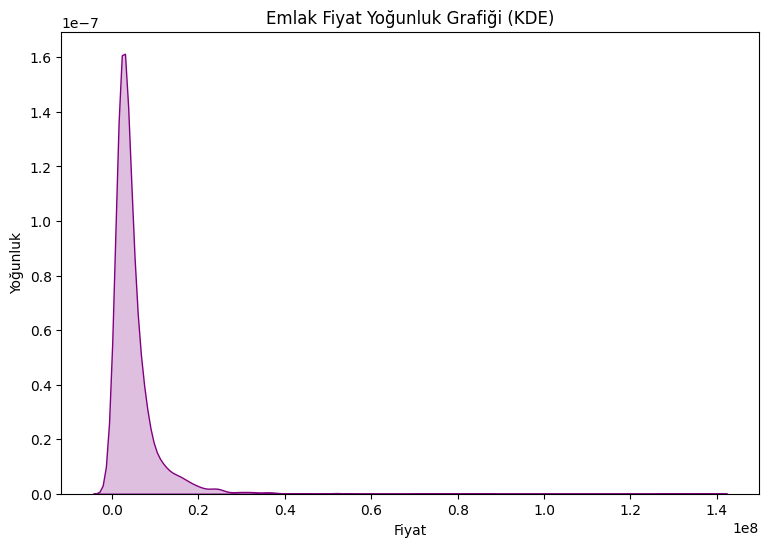

In [124]:
plt.figure(figsize=(9,6))
sns.kdeplot(df['price'], shade=True, color='purple')
plt.title('Emlak Fiyat Yoğunluk Grafiği (KDE)')
plt.xlabel('Fiyat')
plt.ylabel('Yoğunluk')
plt.show()

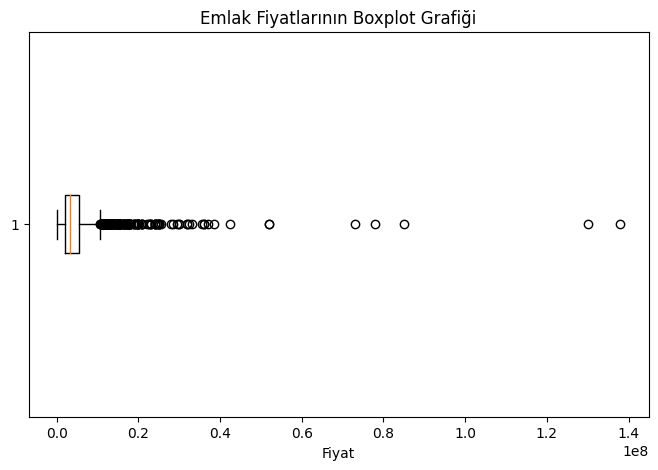

In [125]:
plt.figure(figsize=(8,5))
plt.boxplot(df['price'], vert=False)
plt.title('Emlak Fiyatlarının Boxplot Grafiği')
plt.xlabel('Fiyat')
plt.show()

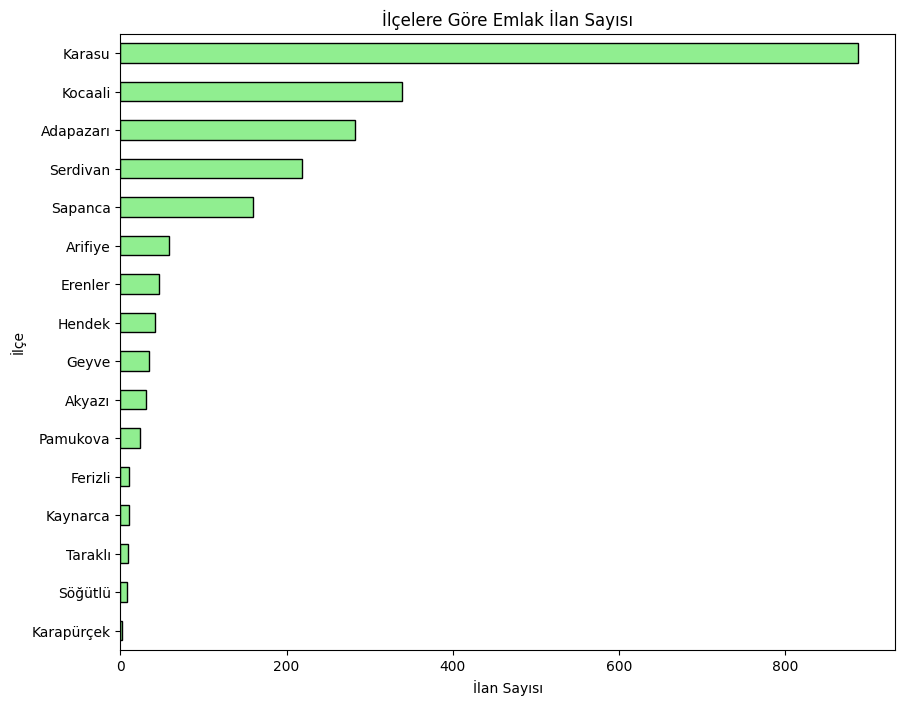

In [126]:
df['county'].value_counts().plot(kind='barh', figsize=(10,8), color='lightgreen', edgecolor='black')
plt.title("İlçelere Göre Emlak İlan Sayısı")
plt.xlabel("İlan Sayısı")
plt.ylabel("İlçe")
plt.gca().invert_yaxis()
plt.show()

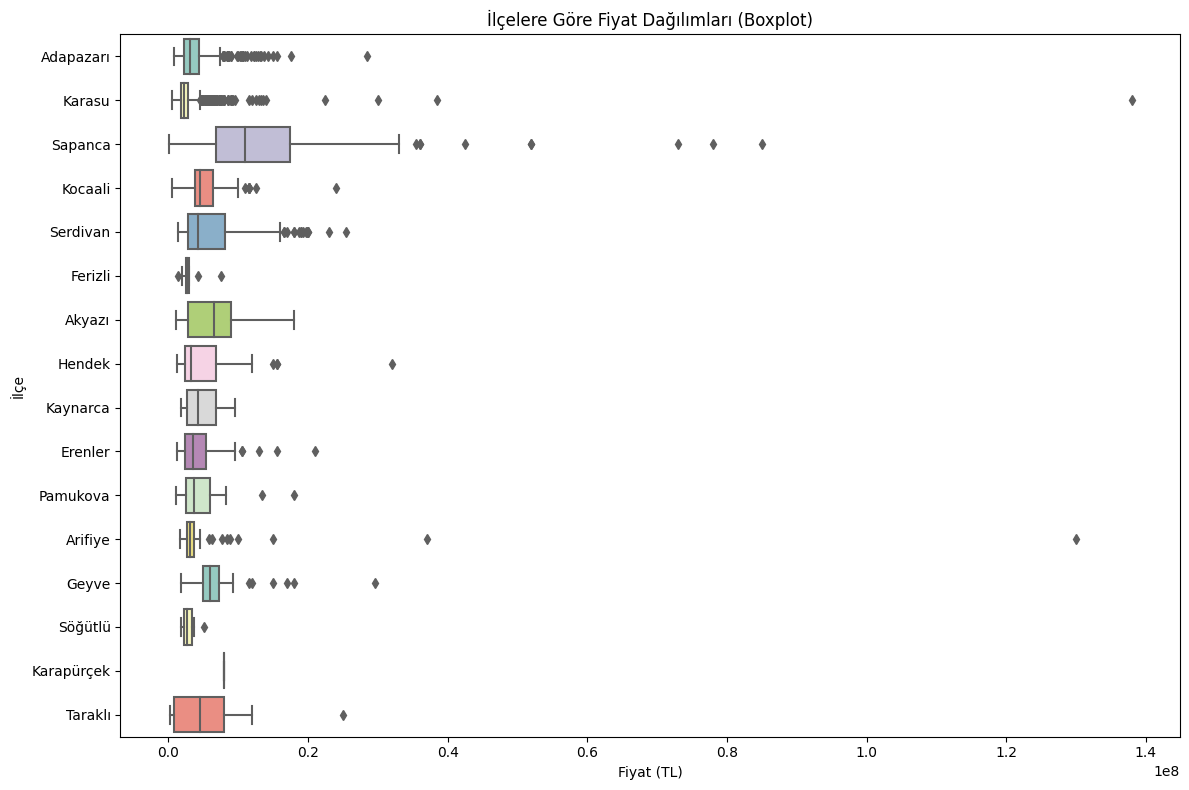

In [127]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='price', y='county', palette='Set3')
plt.title('İlçelere Göre Fiyat Dağılımları (Boxplot)')
plt.xlabel('Fiyat (TL)')
plt.ylabel('İlçe')
  # Fiyatlar çok değişkense log ölçek kullanabilirsin
plt.tight_layout()
plt.show()

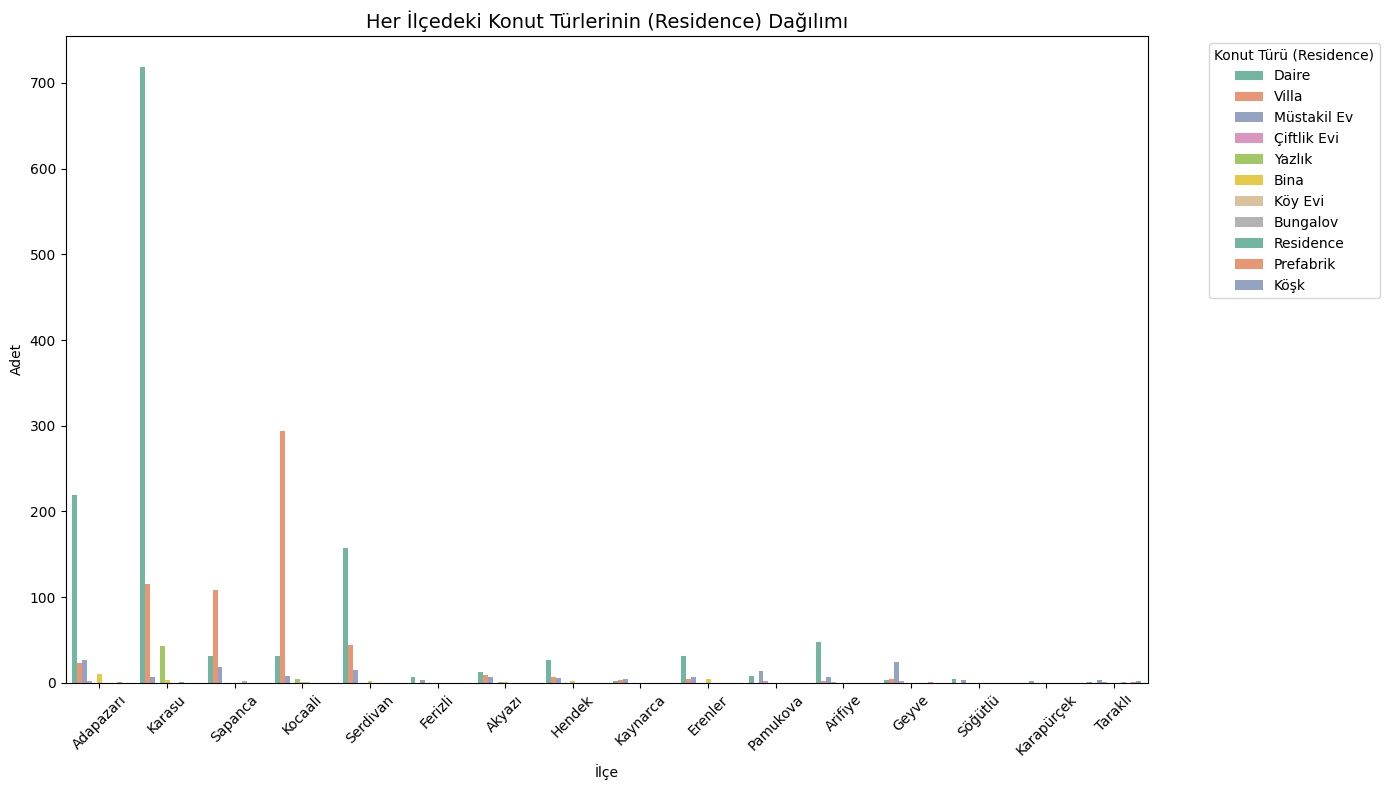

In [128]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='county', hue='residence', palette='Set2')

plt.title('Her İlçedeki Konut Türlerinin (Residence) Dağılımı', fontsize=14)
plt.xlabel('İlçe')
plt.ylabel('Adet')
plt.xticks(rotation=45)
plt.legend(title='Konut Türü (Residence)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

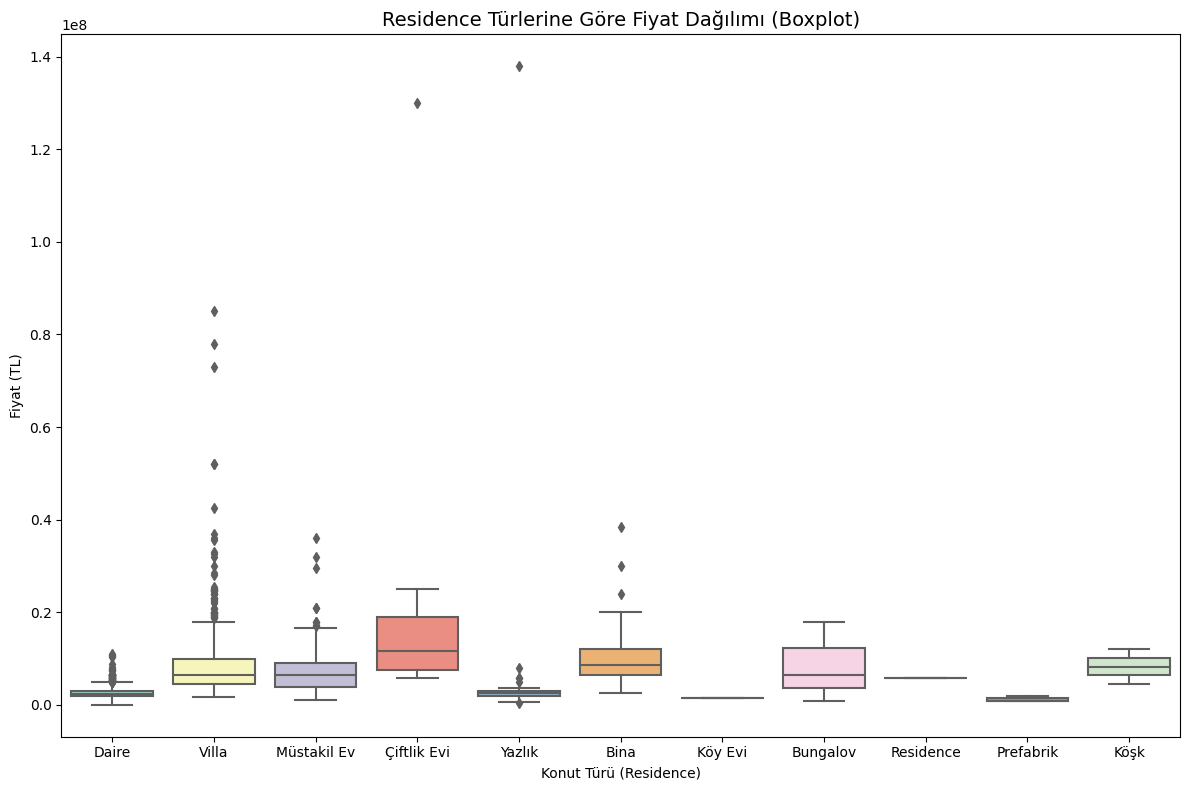

In [129]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='residence', y='price', palette='Set3')

plt.title('Residence Türlerine Göre Fiyat Dağılımı (Boxplot)', fontsize=14)
plt.xlabel('Konut Türü (Residence)')
plt.ylabel('Fiyat (TL)')
plt.tight_layout()
plt.show()

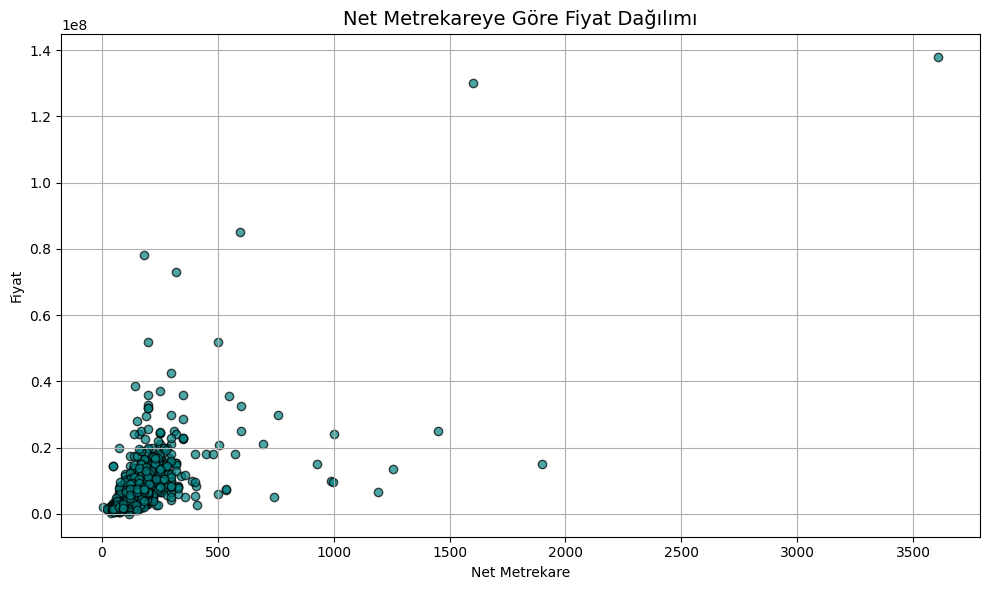

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(df['netSqm'], df['price'], alpha=0.7, color='teal', edgecolors='black')

plt.title('Net Metrekareye Göre Fiyat Dağılımı', fontsize=14)
plt.xlabel('Net Metrekare')
plt.ylabel('Fiyat')
plt.grid(True)
plt.tight_layout()
plt.show()

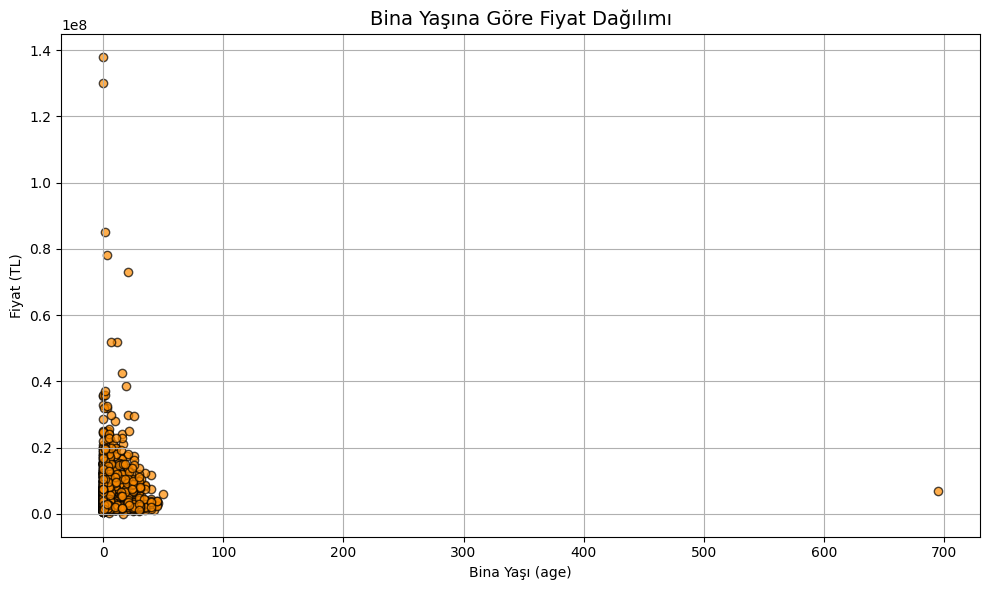

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['price'], alpha=0.7, color='darkorange', edgecolors='black')

plt.title('Bina Yaşına Göre Fiyat Dağılımı', fontsize=14)
plt.xlabel('Bina Yaşı (age)')
plt.ylabel('Fiyat (TL)')
plt.grid(True)
plt.tight_layout()
plt.show()

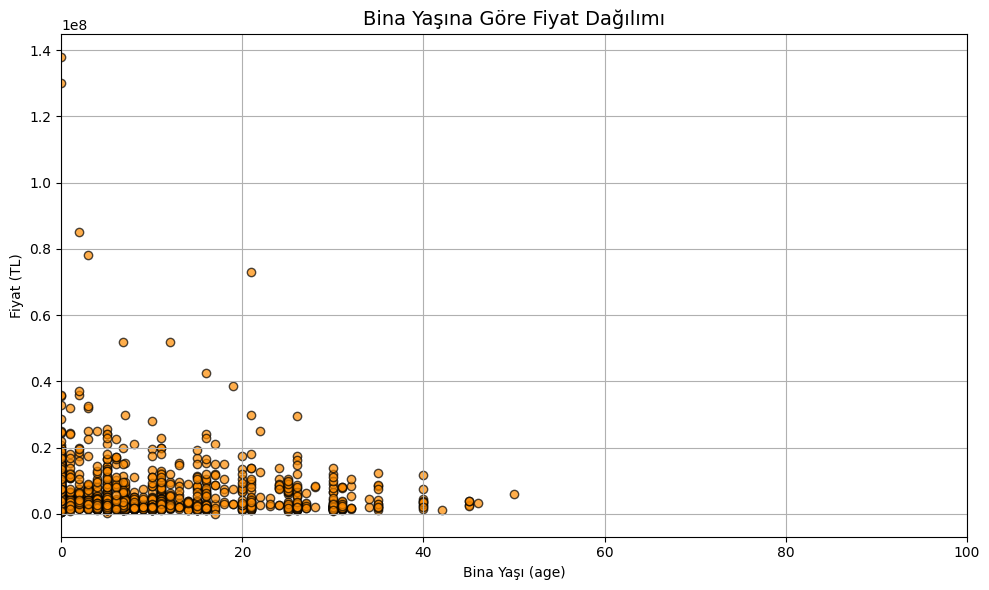

In [132]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['price'], alpha=0.7, color='darkorange', edgecolors='black')

plt.title('Bina Yaşına Göre Fiyat Dağılımı', fontsize=14)
plt.xlabel('Bina Yaşı (age)')
plt.ylabel('Fiyat (TL)')
plt.xlim(0, 100)  # X eksenini 0 ile 100 arasında sınırla
plt.grid(True)
plt.tight_layout()
plt.show()

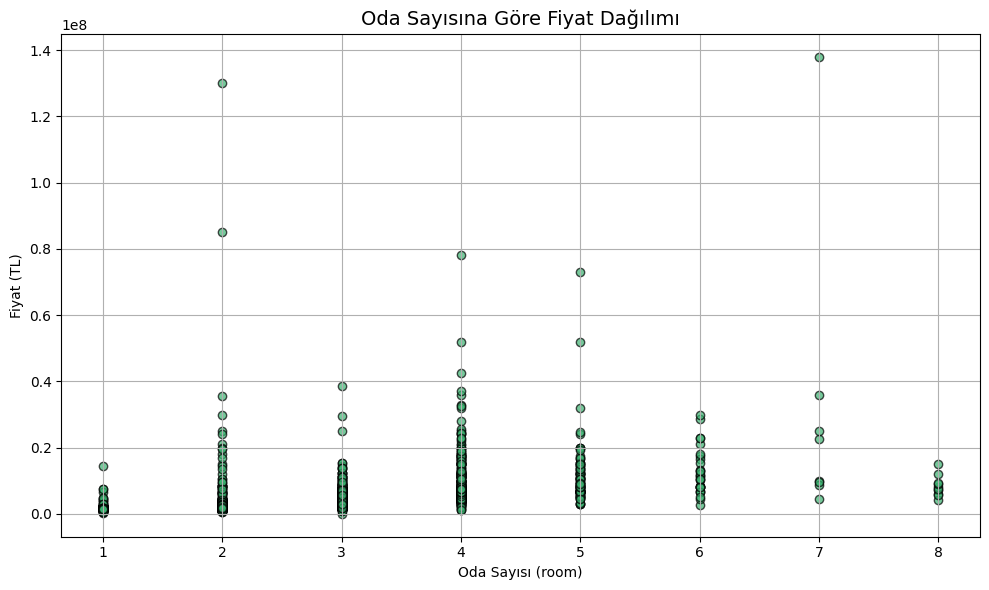

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(df['room'], df['price'], alpha=0.7, color='mediumseagreen', edgecolors='black')

plt.title('Oda Sayısına Göre Fiyat Dağılımı', fontsize=14)
plt.xlabel('Oda Sayısı (room)')
plt.ylabel('Fiyat (TL)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
# Encoding :
from sklearn.preprocessing import LabelEncoder

# 1. Hedef sütunu yalnızca çıkar, değiştirme
y = df['residence']

# 2. Bağımsız verileri (X) hedef sütunu hariç tutarak çıkar
X = df.drop('residence', axis=1)

# 3. X içindeki kategorik sütunları belirle (metin veya mantıksal türde)
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns

# 4. Kodlama uygulamak için X'in bir kopyasını oluştur
X_encoded = X.copy()

# 5. Her kategorik sütuna Label Encoding uygula
label_encoders = {}  # Her sütun için kodlayıcıları saklamak (daha sonra kod çözme için faydalı)
for col in categorical_columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le  # Kodlayıcıyı sözlükte sakla

# 6. Kodlanan sütunları yazdır
print(" Aşağıdaki sütunlar kodlandı:\n", list(categorical_columns))


 Aşağıdaki sütunlar kodlandı:
 ['district', 'county', 'heating', 'fuel', 'build', 'buildState', 'usage', 'credit', 'barter', 'landRegisterName', 'authorizedRealtor', 'furnished', 'mainCategory', 'sides', 'registerState', 'is_amount_zero']


## CART Algoritması

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import joblib

#  1. Hedef sütun
y = df['residence']

#  2. Özellikler (önceki Label Encoding işleminden sonra)
X = X_encoded  # Bunun önceki kodlama işleminden çıkan X_encoded olduğundan emin ol

# Stratify olmadan (bazı sınıflar nadir olduğu için)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  4. Decision Tree (CART) modelini eğit
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

#  5. Tahmin yap
y_pred = model.predict(X_test)

#  6. Değerlendirme, uyarıları önlemek için
print(" Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print(" Kesinlik (Precision):", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print(" Duyarlılık (Recall):", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(" F1 Skoru:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

#  7. Ayrıntılı sınıflandırma raporu
print("\n Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=0))

#  8. Modeli daha sonra kullanmak için kaydet
joblib.dump(model, 'cart_residence_model.pkl')
print(" Model başarıyla 'cart_residence_model.pkl' olarak kaydedildi.")

 Doğruluk (Accuracy): 0.8518518518518519
 Kesinlik (Precision): 0.8575798520651461
 Duyarlılık (Recall): 0.8518518518518519
 F1 Skoru: 0.8529526477764539

 Sınıflandırma Raporu:
               precision    recall  f1-score   support

        Bina       0.00      0.00      0.00         6
    Bungalov       0.00      0.00      0.00         1
       Daire       0.92      0.95      0.94       257
        Köşk       0.00      0.00      0.00         1
 Müstakil Ev       0.32      0.46      0.38        24
   Prefabrik       0.00      0.00      0.00         0
       Villa       0.93      0.84      0.89       129
      Yazlık       0.25      0.25      0.25        12
 Çiftlik Evi       1.00      0.50      0.67         2

    accuracy                           0.85       432
   macro avg       0.38      0.33      0.35       432
weighted avg       0.86      0.85      0.85       432

 Model başarıyla 'cart_residence_model.pkl' olarak kaydedildi.


In [136]:
# Tahmin etmek için 1. örnek :

import pandas as pd
import joblib

#  1. Kaydedilmiş modeli (CART) yükle
model = joblib.load('cart_residence_model.pkl')

#  2. Modelde kullanılan özellik sütunları
feature_columns = X_encoded.columns

#  3. Her değer için açıklama ile yeni manuel bir satır
new_data = pd.DataFrame([{
    'price': 1500000,                   # Fiyat (sayı)
    'room': 3,                          # Oda sayısı (3+1)
    'livingRoom': 1,                    # Salon sayısı
    'bathRoom': 1,                      # Banyo sayısı
    'age': 5,                           # Bina yaşı
    'heating': 1,                       # Örnek: 1 = Kombi (LabelEncoder'a göre)
    'fuel': 0,                          # 0 = Doğalgaz
    'build': 2,                         # 2 = Betonarme
    'buildState': 1,                    # 1 = İkinci El
    'usage': 0,                         # 0 = Boş
    'credit': 0,                        # 0 = Uygun
    'barter': 1,                        # 1 = Yapılır
    'landRegisterName': 1,             # 1 = Kat İrtifakı
    'authorizedRealtor': 1,            # 1 = DOĞRU
    'furnished': 0,                    # 0 = YANLIŞ
    'mainCategory': 0,                 # 0 = Konut (genellikle tek)
    'fee': 250,                        # Komisyon
    'sides': 3,                        # 3 = K-D-B (örnek)
    'onlineVisit': 0,                  # 0 = Aktif değil
    'registerState': 1,                # 1 = Kat İrtifakı
    'lat': 40.8,                       # Koordinatlar
    'lon': 30.4,
    'netSqm': 90,                      # Net metrekare
    'grossSqm': 110,                   # Brüt metrekare
    'is_amount_zero': 0,              # 0 fiyat değil
    'katBilgisi': 5,                   # Kat
    'toplamKatSayisi': 10,            # Toplam kat sayısı
    'district': 20,                   # Belirli bir bölge için kod
    'county': 5                       # İlçe Geyve
}], columns=feature_columns)

#  4. Modeli kullanarak residence türünü tahmin et
predicted_residence = model.predict(new_data)[0]

print(f" Tahmin edilen 'residence' türü: {predicted_residence}")

 Tahmin edilen 'residence' türü: Daire


In [137]:
# Tahmin etmek için 2. örnek :

import pandas as pd
import joblib

#  1. Kaydedilmiş modeli (CART) yükle
model = joblib.load('cart_residence_model.pkl')

#  2. Modelde kullanılan özellik sütunları
feature_columns = X_encoded.columns

#  3. Her değer için açıklama ile yeni manuel bir satır
new_data = pd.DataFrame([{
    'price': 3000000,                   # Fiyat (sayı)
    'room': 5,                          # Oda sayısı (6+1)
    'livingRoom': 1,                    # Salon sayısı
    'bathRoom': 2,                      # Banyo sayısı
    'age': 5,                           # Bina yaşı
    'heating': 1,                       # Örnek: 1 = Kombi (LabelEncoder'a göre)
    'fuel': 0,                          # 0 = Doğalgaz
    'build': 2,                         # 2 = Betonarme
    'buildState': 1,                    # 1 = İkinci El
    'usage': 0,                         # 0 = Boş
    'credit': 0,                        # 0 = Uygun
    'barter': 1,                        # 1 = Yapılır
    'landRegisterName': 1,             # 1 = Kat İrtifakı
    'authorizedRealtor': 1,            # 1 = DOĞRU
    'furnished': 0,                    # 0 = YANLIŞ
    'mainCategory': 0,                 # 0 = Konut (genellikle tek)
    'fee': 250,                        # Komisyon
    'sides': 3,                        # 3 = K-D-B (örnek)
    'onlineVisit': 0,                  # 0 = Aktif değil
    'registerState': 1,                # 1 = Kat İrtifakı
    'lat': 40.8,                       # Koordinatlar
    'lon': 30.4,
    'netSqm': 200,                      # Net metrekare
    'grossSqm': 280,                   # Brüt metrekare
    'is_amount_zero': 0,              # 0 fiyat değil
    'katBilgisi': 5,                   # Kat
    'toplamKatSayisi': 10,            # Toplam kat sayısı
    'district': 20,                   # Belirli bir bölge için kod
    'county': 8                       # İlçe Karasu
}], columns=feature_columns)

#  4. Modeli kullanarak residence türünü tahmin et
predicted_residence = model.predict(new_data)[0]

print(f" Tahmin edilen 'residence' türü: {predicted_residence}")

 Tahmin edilen 'residence' türü: Müstakil Ev


In [138]:
# Tahmin etmek için 3. örnek :

import pandas as pd
import joblib

#  1. Kaydedilmiş modeli (CART) yükle
model = joblib.load('cart_residence_model.pkl')

#  2. Modelde kullanılan özellik sütunları
feature_columns = X_encoded.columns

#  3. Her değer için açıklama ile yeni manuel bir satır
new_data = pd.DataFrame([{
    'price': 3500000,                   # Fiyat (sayı)
    'room': 6,                          # Oda sayısı (6+1)
    'livingRoom': 1,                    # Salon sayısı
    'bathRoom': 2,                      # Banyo sayısı
    'age': 5,                           # Bina yaşı
    'heating': 1,                       # Örnek: 1 = Kombi (LabelEncoder'a göre)
    'fuel': 0,                          # 0 = Doğalgaz
    'build': 2,                         # 2 = Betonarme
    'buildState': 1,                    # 1 = İkinci El
    'usage': 0,                         # 0 = Boş
    'credit': 0,                        # 0 = Uygun
    'barter': 1,                        # 1 = Yapılır
    'landRegisterName': 1,             # 1 = Kat İrtifakı
    'authorizedRealtor': 1,            # 1 = DOĞRU
    'furnished': 0,                    # 0 = YANLIŞ
    'mainCategory': 0,                 # 0 = Konut (genellikle tek)
    'fee': 250,                        # Komisyon
    'sides': 3,                        # 3 = K-D-B (örnek)
    'onlineVisit': 0,                  # 0 = Aktif değil
    'registerState': 1,                # 1 = Kat İrtifakı
    'lat': 40.8,                       # Koordinatlar
    'lon': 30.4,
    'netSqm': 200,                      # Net metrekare
    'grossSqm': 210,                   # Brüt metrekare
    'is_amount_zero': 0,              # 0 fiyat değil
    'katBilgisi': 5,                   # Kat
    'toplamKatSayisi': 10,            # Toplam kat sayısı
    'district': 20,                   # Belirli bir bölge için kod (örneğin: Serdivan)
    'county': 8                       # İlçe Karasu
}], columns=feature_columns)

#  4. Modeli kullanarak residence türünü tahmin et
predicted_residence = model.predict(new_data)[0]

print(f" Tahmin edilen 'residence' türü: {predicted_residence}")

 Tahmin edilen 'residence' türü: Villa


## KNN Algoritması

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Hedef sütun
y = df['residence']

# 2. Kodlanmış özellikler
X = X_encoded

# 3. Verileri böl (nadir sınıflar nedeniyle stratify olmadan)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. KNN modelini eğit (başlangıç olarak komşu sayısı = 5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 5. Tahmin yap
y_pred = knn_model.predict(X_test)

# 6. Değerlendirme
print(" Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print(" Kesinlik (Precision):", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print(" Duyarlılık (Recall):", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(" F1 Skoru:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
print("\n📋 Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=0))

 Doğruluk (Accuracy): 0.8310185185185185
 Kesinlik (Precision): 0.7743202210742218
 Duyarlılık (Recall): 0.8310185185185185
 F1 Skoru: 0.798555595517511

📋 Sınıflandırma Raporu:
               precision    recall  f1-score   support

        Bina       0.00      0.00      0.00         6
    Bungalov       0.00      0.00      0.00         1
       Daire       0.87      0.95      0.91       257
        Köşk       0.00      0.00      0.00         1
 Müstakil Ev       0.33      0.12      0.18        24
   Prefabrik       0.00      0.00      0.00         0
       Villa       0.79      0.87      0.83       129
      Yazlık       0.00      0.00      0.00        12
 Çiftlik Evi       0.00      0.00      0.00         2

    accuracy                           0.83       432
   macro avg       0.22      0.22      0.21       432
weighted avg       0.77      0.83      0.80       432



## **Random Forest Nedir?**


</br>
Random Forest, birden çok Karar Ağacı (Decision Tree) oluşturarak çalışan ve her ağacın sonucuna </br>göre nihai bir tahmin yapan topluluk (ensemble) öğrenme yöntemidir.</br>

Overfitting'i azaltır.
</br>
Daha sağlam ve doğru tahminler üretir.</br>

Eğitim verisinin farklı alt kümeleri ve özellikleri kullanılarak birçok ağaç eğitilir.</br>

## Random Forest Classifier  Algoritmasi

# Neden RandomForestClassifier'ı seçtim?
</br>
<strong> 1) Basitlik ve gücü birleştirir</strong></br>
Random Forest, karar ağaçlarından (Decision Trees) oluşan bir ensemble algoritmasıdır. Bu, karmaşık verilerle başa </br>çıkmada çok güçlü olmasını sağlar, ancak aynı zamanda kullanımı kolaydır ve fazla ön yapılandırma gerektirmez.</br>
<strong> 2) Dengesiz sınıflarla başa çıkabilir</strong></br>
Projemizde, hedef sütun olan residence 11 farklı sınıfa sahip ve bazıları nadir (örneğin, Köşk, Çiftlik Evi). </br>RandomForestClassifier, bu tür verilerle Naive Bayes veya KNN’den daha iyi başa çıkar çünkü:</br>
Ağaçlar arasında oylama yapar.</br>
Sadece sınıf dağılımlarına bağımlı değildir.</br>
<strong> 3) Kategorik ve sayısal verilerde mükemmel performans</strong></br>
Verileriniz kodlanmış sütunlar (heating, fuel, build, vb.) ve sayısal sütunlar (price, age, netSqm) içeriyor. Random </br>Forest, SVM veya KNN gibi verilerin normalizasyonunu gerektirmez ve verilerimiz üzerinde doğrudan çalışabilir.</br>
<strong> 4) Decision Tree’ye kıyasla overfitting’e daha az yatkın</strong></br>
DecisionTreeClassifier bazen verilerdeki gürültüyü bile öğrenirken, RandomForestClassifier farklı özelliklere sahip </br>birden fazla ağaç oluşturarak ve sonuçlarını birleştirerek overfitting riskini azaltır.</br>

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib

# 1. Hedef sütun (y)
y = df['residence']

# 2. Bağımsız özellikler (X) kodlamadan sonra
X = X_encoded  # X_encoded'ın mevcut ve kodlanmış olduğundan emin ol

# 3. Verileri böl (nadir sınıflar nedeniyle stratify olmadan)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Random Forest modelini eğit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Tahmin yap
y_pred = rf_model.predict(X_test)

# 6. Değerlendirme
print(" Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print(" Kesinlik (Precision):", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print(" Duyarlılık (Recall):", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(" F1 Skoru:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

# 7. Ayrıntılı rapor
print("\n📋 Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=0))

# 8. Modeli kaydet
joblib.dump(rf_model, 'random_forest_residence_model.pkl')
print(" Model başarıyla 'random_forest_residence_model.pkl' olarak kaydedildi.")

 Doğruluk (Accuracy): 0.9074074074074074
 Kesinlik (Precision): 0.8614692814447716
 Duyarlılık (Recall): 0.9074074074074074
 F1 Skoru: 0.8824732398208929

📋 Sınıflandırma Raporu:
               precision    recall  f1-score   support

        Bina       0.00      0.00      0.00         6
    Bungalov       0.00      0.00      0.00         1
       Daire       0.93      0.99      0.96       257
        Köşk       0.00      0.00      0.00         1
 Müstakil Ev       0.71      0.50      0.59        24
   Prefabrik       0.00      0.00      0.00         0
       Villa       0.90      0.98      0.94       129
      Yazlık       0.00      0.00      0.00        12
 Çiftlik Evi       0.00      0.00      0.00         2

    accuracy                           0.91       432
   macro avg       0.28      0.27      0.28       432
weighted avg       0.86      0.91      0.88       432

 Model başarıyla 'random_forest_residence_model.pkl' olarak kaydedildi.


In [141]:
# Tahmin etmek için bir örnek :

import pandas as pd
import joblib

#  1. Kaydedilmiş modeli yükle
model = joblib.load('random_forest_residence_model.pkl')

#  2. Modelde kullanılan özellik sütunları
feature_columns = X_encoded.columns

#  3. Her değer için açıklama ile yeni manuel bir satır
new_data = pd.DataFrame([{
    'price': 1500000,                   # Fiyat (sayı)
    'room': 3,                          # Oda sayısı (3+1)
    'livingRoom': 1,                    # Salon sayısı
    'bathRoom': 1,                      # Banyo sayısı
    'age': 5,                           # Bina yaşı
    'heating': 1,                       # Örnek: 1 = Kombi (LabelEncoder'a göre)
    'fuel': 0,                          # 0 = Doğalgaz
    'build': 2,                         # 2 = Betonarme
    'buildState': 1,                    # 1 = İkinci El
    'usage': 0,                         # 0 = Boş
    'credit': 0,                        # 0 = Uygun
    'barter': 1,                        # 1 = Yapılır
    'landRegisterName': 1,             # 1 = Kat İrtifakı
    'authorizedRealtor': 1,            # 1 = DOĞRU
    'furnished': 0,                    # 0 = YANLIŞ
    'mainCategory': 0,                 # 0 = Konut (genellikle tek)
    'fee': 250,                        # Komisyon
    'sides': 3,                        # 3 = K-D-B (örnek)
    'onlineVisit': 0,                  # 0 = Aktif değil
    'registerState': 1,                # 1 = Kat İrtifakı
    'lat': 40.8,                       # Koordinatlar
    'lon': 30.4,
    'netSqm': 90,                      # Net metrekare
    'grossSqm': 110,                   # Brüt metrekare
    'is_amount_zero': 0,              # 0 fiyat değil
    'katBilgisi': 5,                   # Kat
    'toplamKatSayisi': 10,            # Toplam kat sayısı
    'district': 20,                   # Belirli bir bölge için kod
    'county': 5                       # İlçe Geyve
}], columns=feature_columns)

#  4. Modeli kullanarak residence türünü tahmin et
predicted_residence = model.predict(new_data)[0]

print(f" Tahmin edilen 'residence' türü: {predicted_residence}")

 Tahmin edilen 'residence' türü: Daire


In [142]:
# RandomForestClassifier modeli kullanarak bir örnek tahmin yapsın :
import pandas as pd
import joblib

# 1. Random Forest modelini yükle
rf_model = joblib.load('random_forest_residence_model.pkl')

# 2. Özellik sütunları - X_encoded'ın önceden oluşturulduğundan emin ol
feature_columns = X_encoded.columns

# 3. Villa özelliklerini taklit eden yeni bir satır oluştur, her değer için kodlama açıklaması ile
new_data_rf = pd.DataFrame([{
    'price': 4500000,                   # Fiyat
    'room': 8,                          # Oda sayısı (8 oda)
    'livingRoom': 1,                    # Salon sayısı
    'bathRoom': 3,                      # Banyo sayısı
    'age': 2,                           # Gayrimenkul yaşı (yıl)
    'heating': 1,                       # 1 = Kombi
    'fuel': 0,                          # 0 = Doğalgaz
    'build': 2,                         # 2 = Betonarme
    'buildState': 1,                    # 1 = İkinci El
    'usage': 0,                         # 0 = Boş
    'credit': 0,                        # 0 = Uygun
    'barter': 0,                        # 0 = Yapılmaz
    'landRegisterName': 1,             # 1 = Kat İrtifakı
    'authorizedRealtor': 1,            # 1 = DOĞRU
    'furnished': 1,                    # 1 = DOĞRU (mobilyalı)
    'mainCategory': 0,                 # 0 = Konut (ana kategori - genellikle tek)
    'fee': 300,                         # Komisyon (TL)
    'sides': 3,                         # 3 = K-D-B (yönler için örnek)
    'onlineVisit': 0,                  # 0 = Aktif değil
    'registerState': 1,                # 1 = Kat İrtifakı
    'lat': 40.75,                      # Enlem (latitude)
    'lon': 30.45,                      # Boylam (longitude)
    'netSqm': 250,                     # Net metrekare
    'grossSqm': 320,                   # Brüt metrekare
    'is_amount_zero': 0,              # 0 = Fiyat sıfır değil
    'katBilgisi': 0,                   # 0 = Zemin kat veya müstakil
    'toplamKatSayisi': 1,              # 1 = Toplam kat sayısı
    'district': 17,                    # 17 = Belirli bir bölgeyi temsil eder (örneğin Sapanca)
    'county': 3                        # 3 = Bir şehri temsil eder (örneğin Sapanca)
}], columns=feature_columns)

# 4. Modeli kullanarak tahmin yap
predicted_residence_rf = rf_model.predict(new_data_rf)[0]
print(f" Random Forest tahmini : {predicted_residence_rf}")

 Random Forest tahmini : Villa


# Encoding

In [143]:
from sklearn.preprocessing import LabelEncoder

# 1.  Kategorik sütunları belirle (object veya bool olanlar)
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# 2.  Yeni bir DataFrame oluştur: tüm verilerle birlikte
df_encoded = df.copy()

# 3.  Her kategorik sütuna Label Encoding uygula
label_encoders = {}  # Kodlayıcıları saklamak için
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # İleri kullanım için sakla

# 4.  Kodlanan sütunları yazdır
print(" Label Encoding uygulanan sütunlar:")
print(list(categorical_columns))

#  Dosyayı CSV olarak kaydet
df_encoded.to_csv('encoded_dataset.csv', index=False)

print(" Kodlama sonrası veriler 'encoded_dataset.csv' olarak kaydedildi.")

df_encoded.head(10)

 Label Encoding uygulanan sütunlar:
['district', 'county', 'residence', 'heating', 'fuel', 'build', 'buildState', 'usage', 'credit', 'barter', 'landRegisterName', 'authorizedRealtor', 'furnished', 'mainCategory', 'sides', 'registerState', 'is_amount_zero']
 Kodlama sonrası veriler 'encoded_dataset.csv' olarak kaydedildi.


,price,district,county,residence,room,livingRoom,bathRoom,age,heating,fuel,build,buildState,usage,credit,barter,landRegisterName,authorizedRealtor,furnished,mainCategory,fee,sides,onlineVisit,registerState,lat,lon,netSqm,grossSqm,is_amount_zero,katBilgisi,toplamKatSayisi
0,2500000.0,105,0,2,3,1,1,30.0,8,1,1,3,1,1,0,2,0,1,0,200.0,14,1,2,40.78,30.40,110,122,0,2,4
1,1500000.0,166,8,2,2,1,1,0.0,8,1,1,3,1,1,1,2,1,1,0,0.0,17,0,2,41.11,30.69,75,80,0,2,3
2,19500000.0,117,12,8,4,1,2,10.0,8,1,1,3,1,1,0,2,0,1,0,1000.0,1,1,2,40.70,30.21,200,250,0,2,2
3,3350000.0,81,8,2,3,1,1,0.0,8,1,1,1,1,1,1,3,0,1,0,0.0,1,1,3,41.10,30.68,120,130,0,3,3
4,3700000.0,169,10,8,3,1,3,0.0,8,1,1,1,1,1,1,2,0,1,0,0.0,9,1,2,41.07,30.86,140,160,0,2,3
5,2150000.0,172,8,2,2,1,1,7.0,8,1,1,1,1,1,1,2,0,1,0,1.0,17,1,2,41.12,30.66,90,95,0,2,3
6,21000000.0,59,12,5,6,1,6,5.0,8,1,1,3,1,1,0,2,0,0,0,1.0,9,1,2,40.69,30.29,300,920,0,2,2
7,1600000.0,196,13,2,1,1,1,5.0,9,1,1,3,1,1,0,2,0,0,0,500.0,6,0,2,40.77,30.36,25,32,0,3,3
8,5250000.0,166,8,8,3,1,1,0.0,12,1,1,1,1,1,0,2,0,1,0,0.0,7,0,2,41.10,30.71,125,130,0,2,3
9,4100000.0,8,10,8,3,1,2,5.0,12,1,1,3,1,1,1,3,0,1,0,0.0,10,1,3,41.07,30.89,135,150,0,2,3


In [144]:
df_Regression= pd.read_csv('/kaggle/working/encoded_dataset.csv')

## Aykırı değerleri işlemesi

<Axes: >

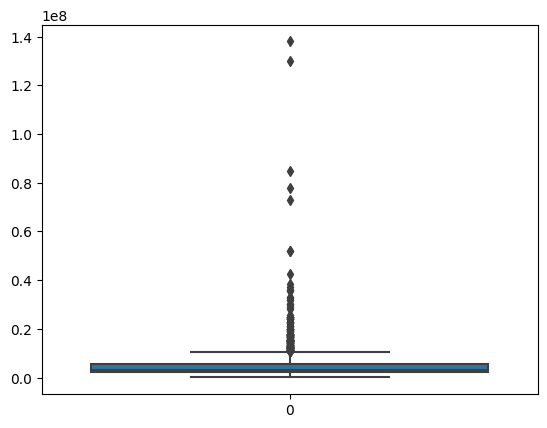

In [145]:
import seaborn as sns
sns.boxplot(df_Regression['price'])

In [146]:
import numpy as np
df_Regression['price'] = np.log1p(df_Regression['price'])

## Linear Regression

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Bağımsız değişkenleri (X) ve bağımlı değişkeni (y) belirleme
X = df_Regression.drop('price', axis=1)  # rental_amount hariç tüm sütunlar
y = df_Regression['price']  # Hedef, rental_amount tahmin etmek

# Veriyi eğitim ve test olarak bölelim (Eğitim için %80, Test için %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"-> Eğitim verisi boyutu: {X_train.shape}")
print(f"-> Test verisi boyutu: {X_test.shape}")

# Linear Regression modelini oluştur
lr_model = LinearRegression()

# Modeli eğitim verisi ile eğit
lr_model.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred = lr_model.predict(X_test)

# Model değerlendirmesi
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print(f"->Linear Regression Değerlendirmesi:")
print()
print(f"     Mean Squared Error (MSE): {mse:.2f}")
print(f"     Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"     Mean Absolute Error (MAE): {mae:.2f}")
print(f"     R2 Skoru (Determinasyon Katsayısı): {r2:.4f}")

-> Eğitim verisi boyutu: (1728, 29)
-> Test verisi boyutu: (432, 29)

->Linear Regression Değerlendirmesi:

     Mean Squared Error (MSE): 0.18
     Root Mean Squared Error (RMSE): 0.43
     Mean Absolute Error (MAE): 0.28
     R2 Skoru (Determinasyon Katsayısı): 0.6661


## linear regression with normalization

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Bağımsız değişkenleri (X) ve bağımlı değişkeni (y) belirleme
X = df_Regression.drop('price', axis=1)  # price hariç tüm sütunlar
y = df_Regression['price']  # Hedef, price'ı tahmin etmek

# price sütununu Min-Max Scaling ile normalleştirme
scaler_y = MinMaxScaler()
y = y.values.reshape(-1, 1)  # MinMaxScaler'in bunu 2D olarak alması gerektiğinden y'yi yeniden şekillendir
y_scaled = scaler_y.fit_transform(y)
y = y_scaled.ravel()  # train_test_split ile işlem yapabilmek için yeniden 1D'ye dönüştür

# Veriyi eğitim ve test olarak bölelim (Eğitim için %80, Test için %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"-> Eğitim verisi boyutu: {X_train.shape}")
print(f"-> Test verisi boyutu: {X_test.shape}")

print()
# Özelliklerin ölçeklenmesi (ElasticNet için tercih edilir)
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# Linear Regression modelini oluştur
lr_model = LinearRegression()

# Modeli eğitim verisi ile eğit
lr_model.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred = lr_model.predict(X_test)

# Model değerlendirmesi
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"-> Linear Regression Değerlendirmesi:")
print()
print(f"      Mean Squared Error (MSE): {mse:.2f}")
print(f"      Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"      Mean Absolute Error (MAE): {mae:.2f}")
print(f"      R2 Skoru (Determinasyon Katsayısı): {r2:.4f}")

-> Eğitim verisi boyutu: (1728, 29)
-> Test verisi boyutu: (432, 29)

-> Linear Regression Değerlendirmesi:

      Mean Squared Error (MSE): 0.00
      Root Mean Squared Error (RMSE): 0.05
      Mean Absolute Error (MAE): 0.03
      R2 Skoru (Determinasyon Katsayısı): 0.6661


## Linear Optimizasyon

**Uç Değer Kaldırma :** Fiyat sütunundaki aykırı değerler, IQR yöntemiyle (1.5 * IQR kuralı) filtrelendi.</br> Bu, modelin aykırı verilerden etkilenmesini azaltır ve tahmin doğruluğunu artırabilir</br>
</br>.
**Özellik Mühendisliği :** netSqm_room (net metrekare ve oda sayısı çarpımı) ve </br>
age_furnished (bina yaşı ve mobilyalı olma durumu çarpımı) etkileşimli özellikleri eklendi.</br>
Bu, özellikler arasındaki ilişkileri yakalayarak modelin daha fazla bilgi öğrenmesini sağlar.</br>

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Fiyat sütununda uç değerleri IQR kullanarak kaldırma
Q1 = df_Regression['price'].quantile(0.25)
Q3 = df_Regression['price'].quantile(0.75)
IQR = Q3 - Q1
df_Regression = df_Regression[(df_Regression['price'] >= Q1 - 1.5 * IQR) & (df_Regression['price'] <= Q3 + 1.5 * IQR)]

# Etkileşimli özellikler ekleme
df_Regression['netSqm_room'] = df_Regression['netSqm'] * df_Regression['room']
df_Regression['age_furnished'] = df_Regression['age'] * df_Regression['furnished']

# Bağımsız değişkenleri (X) ve bağımlı değişkeni (y) belirleme
X = df_Regression.drop('price', axis=1)  # price hariç tüm sütunlar
y = df_Regression['price']  # Hedef, price tahmin etmek

# Veriyi eğitim ve test olarak bölelim (Eğitim için %80, Test için %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"-> Eğitim verisi boyutu: {X_train.shape}")
print(f"-> Test verisi boyutu: {X_test.shape}")

# Özelliklerin Min-Max Scaling ile normalleştirilmesi
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression modelini oluştur
lr_model = LinearRegression()

# Modeli ölçeklenmiş eğitim verisi ile eğit
lr_model.fit(X_train_scaled, y_train)

# Test verisi ile tahmin yap
y_pred = lr_model.predict(X_test_scaled)

# Model değerlendirmesi
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print(f"-> Linear Regression Değerlendirmesi (Uç Değerler Kaldırıldı, Min-Max Scaling ve Özellik Mühendisliği):")
print()
print(f"     Mean Squared Error (MSE): {mse:.2f}")
print(f"     Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"     Mean Absolute Error (MAE): {mae:.2f}")
print(f"     R2 Skoru (Determinasyon Katsayısı): {r2:.4f}")

-> Eğitim verisi boyutu: (1699, 31)
-> Test verisi boyutu: (425, 31)

-> Linear Regression Değerlendirmesi (Uç Değerler Kaldırıldı, Min-Max Scaling ve Özellik Mühendisliği):

     Mean Squared Error (MSE): 0.12
     Root Mean Squared Error (RMSE): 0.35
     Mean Absolute Error (MAE): 0.25
     R2 Skoru (Determinasyon Katsayısı): 0.7136


# **SVR Algoritması**

### **SVR (Support Vector Regression)**,
Destek Vektör Makineleri (SVM) algoritmasının regresyon </br>problemleri için uyarlanmış halidir. SVR, doğrusal ya da doğrusal olmayan ilişkilerde, verileri </br>en iyi şekilde tahmin edecek bir fonksiyon bulmayı amaçlar.</br>
</br>
SVR, bağımlı bir değişkeni (sürekli bir çıktı) tahmin etmek için kullanılır. Amaç, gerçek değerlere </br>belirli bir tolerans (𝜀) içinde kalan bir regresyon hattı (ya da eğrisi) çizmektir.</br>

 **Nasıl Çalışır?**
</br>
**1) 𝜀 (epsilon) tüpü oluşturulur:**</br>

Tahmin hattı etrafında 𝜀 genişliğinde bir tüp varsayılır. Bu tüp içinde kalan tahmin hataları önemsiz kabul edilir.</br>
</br>
Yani model, bu tüp içindeki verileri cezalandırmaz.</br>
</br>
**2) Marj dışındaki noktalar:**
</br>
</br>
Bu tüpün dışında kalan noktalar, cezalandırılır (loss function devreye girer).</br>
</br>
Model bu cezaları minimize etmeye çalışır.</br>
</br>
**3) Amaç:**
</br>
</br>
Tahmin doğrusu (ya da eğrisi) ile gerçek veriler arasındaki farkı minimize ederken aynı zamanda modelin karmaşıklığını da minimumda tutmak.
</br>
Bu denge, kernel fonksiyonu ve C parametresi ile sağlanır.

## SVR vs Lineer Regresyon

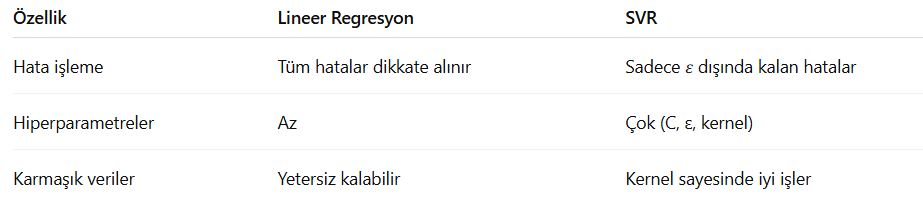

# SVR Uygulaması

In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Özellikler (X) ve hedef (y) belirleme
X = df_Regression.drop('price', axis=1)  # price hariç tüm sütunlar
y = df_Regression['price']  # Hedef, price'ı tahmin etmek

# Veriyi eğitim ve test olarak bölme (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"-> Eğitim verisi boyutu: {X_train.shape}")
print(f"-> Test verisi boyutu: {X_test.shape}")

print()
# Özelliklerin ölçeklenmesi (SVR için çok önemli)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR modeli oluşturma
svr_model = SVR(kernel='rbf')  # kernel='linear' veya 'poly' de deneyebilirsiniz

#rbf (Radial Basis Function) kernel, özellikle karmaşık ve doğrusal olmayan ilişkiler
#içeren verilerde çok güçlüdür

# Modeli eğitim verisiyle eğitme
svr_model.fit(X_train_scaled, y_train)

# Test verisiyle tahmin yapma
y_pred = svr_model.predict(X_test_scaled)

# Model değerlendirmesi
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Modeli ve scaler'ı kaydetme
joblib.dump(svr_model, 'svr_residence_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("-> Model 'svr_residence_model.pkl' ve scaler 'scaler.pkl' olarak kaydedildi.")
print(f"-> SVR Değerlendirmesi:")
print(f"     Mean Squared Error (MSE): {mse:.2f}")
print(f"     Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"     Mean Absolute Error (MAE): {mae:.2f}")
print(f"     R2 Skoru (Determinasyon Katsayısı): {r2:.4f}")

-> Eğitim verisi boyutu: (1699, 31)
-> Test verisi boyutu: (425, 31)

-> Model 'svr_residence_model.pkl' ve scaler 'scaler.pkl' olarak kaydedildi.
-> SVR Değerlendirmesi:
     Mean Squared Error (MSE): 0.11
     Root Mean Squared Error (RMSE): 0.33
     Mean Absolute Error (MAE): 0.22
     R2 Skoru (Determinasyon Katsayısı): 0.7476


In [151]:
X.head(10)

,district,county,residence,room,livingRoom,bathRoom,age,heating,fuel,build,buildState,usage,credit,barter,landRegisterName,authorizedRealtor,furnished,mainCategory,fee,sides,onlineVisit,registerState,lat,lon,netSqm,grossSqm,is_amount_zero,katBilgisi,toplamKatSayisi,netSqm_room,age_furnished
0,105,0,2,3,1,1,30.0,8,1,1,3,1,1,0,2,0,1,0,200.0,14,1,2,40.78,30.40,110,122,0,2,4,330,30.0
1,166,8,2,2,1,1,0.0,8,1,1,3,1,1,1,2,1,1,0,0.0,17,0,2,41.11,30.69,75,80,0,2,3,150,0.0
2,117,12,8,4,1,2,10.0,8,1,1,3,1,1,0,2,0,1,0,1000.0,1,1,2,40.70,30.21,200,250,0,2,2,800,10.0
3,81,8,2,3,1,1,0.0,8,1,1,1,1,1,1,3,0,1,0,0.0,1,1,3,41.10,30.68,120,130,0,3,3,360,0.0
4,169,10,8,3,1,3,0.0,8,1,1,1,1,1,1,2,0,1,0,0.0,9,1,2,41.07,30.86,140,160,0,2,3,420,0.0
5,172,8,2,2,1,1,7.0,8,1,1,1,1,1,1,2,0,1,0,1.0,17,1,2,41.12,30.66,90,95,0,2,3,180,7.0
6,59,12,5,6,1,6,5.0,8,1,1,3,1,1,0,2,0,0,0,1.0,9,1,2,40.69,30.29,300,920,0,2,2,1800,0.0
7,196,13,2,1,1,1,5.0,9,1,1,3,1,1,0,2,0,0,0,500.0,6,0,2,40.77,30.36,25,32,0,3,3,25,0.0
8,166,8,8,3,1,1,0.0,12,1,1,1,1,1,0,2,0,1,0,0.0,7,0,2,41.10,30.71,125,130,0,2,3,375,0.0
9,8,10,8,3,1,2,5.0,12,1,1,3,1,1,1,3,0,1,0,0.0,10,1,3,41.07,30.89,135,150,0,2,3,405,5.0


In [152]:
#bir örnek tahmin :
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# 1. SVR modelini yükle (eğitilmiş modelin kaydedildiğini varsayıyorum)
svr_model = joblib.load('svr_residence_model.pkl')  # Model dosyasını yükle
scaler = joblib.load('scaler.pkl')  # Eğitimde kullanılan StandardScaler'ı yükle

# 2. Özellik sütunları - X'in önceden oluşturulduğundan emin ol
feature_columns = ['district', 'county', 'residence', 'room', 'livingRoom', 'bathRoom', 'age', 'heating', 
                   'fuel', 'build', 'buildState', 'usage', 'credit', 'barter', 'landRegisterName', 
                   'authorizedRealtor', 'furnished', 'mainCategory', 'fee', 'sides', 'onlineVisit', 
                   'registerState', 'lat', 'lon', 'netSqm', 'grossSqm', 'is_amount_zero', 'katBilgisi', 
                   'toplamKatSayisi', 'netSqm_room', 'age_furnished']

# 3. Villa özelliklerini taklit eden yeni bir satır oluştur
new_data_svr = pd.DataFrame([{
    'room': 6,                          # Oda sayısı (6 oda)
    'livingRoom': 1,                    # Salon sayısı
    'bathRoom': 3,                      # Banyo sayısı
    'age': 2,                           # Gayrimenkul yaşı (yıl)
    'heating': 1,                       # 1 = Kombi
    'fuel': 0,                          # 0 = Doğalgaz
    'build': 2,                         # 2 = Betonarme
    'buildState': 1,                    # 1 = İkinci El
    'usage': 0,                         # 0 = Boş
    'credit': 0,                        # 0 = Uygun
    'barter': 0,                        # 0 = Yapılmaz
    'landRegisterName': 1,             # 1 = Kat İrtifakı
    'authorizedRealtor': 1,            # 1 = DOĞRU
    'furnished': 1,                    # 1 = DOĞRU (mobilyalı)
    'mainCategory': 0,                 # 0 = Konut
    'fee': 300,                         # Komisyon (TL)
    'sides': 3,                         # 3 = K-D-B (yönler için örnek)
    'onlineVisit': 0,                  # 0 = Aktif değil
    'registerState': 1,                # 1 = Kat İrtifakı
    'lat': 40.75,                      # Enlem (latitude)
    'lon': 30.45,                      # Boylam (longitude)
    'netSqm': 250,                     # Net metrekare
    'grossSqm': 320,                   # Brüt metrekare
    'is_amount_zero': 0,              # 0 = Fiyat sıfır değil
    'katBilgisi': 0,                   # 0 = Zemin kat veya müstakil
    'toplamKatSayisi': 1,              # 1 = Toplam kat sayısı
    'district': 17,                    # 17 = Belirli bir bölge
    'county': 3,                       # 3 = ilçe Erenler
    'residence': 1,                    # 1 = Villa
    'netSqm_room': 250 / (6 + 1 + 3),  # netSqm / (room + livingRoom + bathRoom) ≈ 20.83
    'age_furnished': 2 * 1             # age * furnished = 2
}], columns=feature_columns)

# 4. Yeni veriyi ölçeklendirme
new_data_scaled = scaler.transform(new_data_svr)

# 5. Modeli kullanarak fiyat tahmini yap
predicted_price_log = svr_model.predict(new_data_scaled)[0]
predicted_price_svr = np.expm1(predicted_price_log)  # Logaritmik ölçekten orijinal ölçeğe dönüşüm
print(f"SVR tahmini fiyat: {predicted_price_svr:.2f} TL")

SVR tahmini fiyat: 5426504.14 TL


In [153]:
import pandas as pd
import numpy as np
import joblib

# Load the saved model and scaler
model = joblib.load('svr_residence_model.pkl')
scaler = joblib.load('scaler.pkl')

# Ensure X_test and y_test are aligned
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Scale X_test
X_test_scaled = scaler.transform(X_test)

# Create DataFrame for scaled test data
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 1. Test setinden bir satır seç
sample = X_test_df.iloc[[3]]  # 3. satırı al

# 2. Log-scale'de tahmin yap
predicted_log_price = model.predict(sample)[0]

# 3. Gerçek log fiyat
real_log_price = y_test.iloc[3]

# Log'dan çıkmak için expm1 kullan
predicted_price = np.expm1(predicted_log_price)
real_price = np.expm1(real_log_price)

# 4. Sonuçları yazdır
print(f" Tahmin edilen ev fiyatı: {predicted_price:,.2f} TL")
print(f" Gerçek ev fiyatı: {real_price:,.2f} TL")

# 5. Hata hesapla
error = abs(real_price - predicted_price)
mape_example = (error / real_price) * 100 if real_price != 0 else float('inf')

print(f" Sapma miktarı: {error:,.2f} TL")
print(f" Yüzdelik hata (örnek): {mape_example:.2f}%")

 Tahmin edilen ev fiyatı: 1,928,324.65 TL
 Gerçek ev fiyatı: 1,999,999.00 TL
 Sapma miktarı: 71,674.35 TL
 Yüzdelik hata (örnek): 3.58%


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


# SVR Optimizatoin

XGBoost ile Geliştirilmiş Kod ve Ekstra İyileştirmeler XGBoost genellikle SVR'den daha iyi performans gösterdiği için bunu kullanacağız, ayrıca etkileşimli özellikler ekleyecek ve ileri düzey iyileştirmeler yapacağız.

XGBoost (Extreme Gradient Boosting), karar ağaçlarına dayalı bir makine öğrenimi algoritmasıdır. Gradient boosting prensibiyle çalışır ve modelleri ardışık olarak eğiterek hataları azaltır. Hızlı, ölçeklenebilir ve yüksek performanslıdır; genellikle sınıflandırma, regresyon ve sıralama problemlerinde kullanılır. Özellikleri arasında düzenlileştirme (overfitting'i önlemek için), paralel işlem ve eksik verilerle başa çıkma yeteneği bulunur.

SVR (Support Vector Regression) optimizasyonu için XGBoost'un kullanılması, genellikle hiperparametre optimizasyonu veya özellik seçimi gibi görevlerde gerçekleşir. SVR'nin performansı, çekirdek fonksiyonu, C (ceza parametresi) ve epsilon gibi hiperparametrelerine bağlıdır. XGBoost, bu parametreleri optimize etmek için kullanılabilir

In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# IQR kullanarak price sütunundaki uç değerleri kaldırma (daha dar sınırlar: 1.0 * IQR)
Q1 = df_Regression['price'].quantile(0.25)
Q3 = df_Regression['price'].quantile(0.75)
IQR = Q3 - Q1
df_Regression = df_Regression[(df_Regression['price'] >= Q1 - 1.0 * IQR) & (df_Regression['price'] <= Q3 + 1.0 * IQR)]

# Etkileşimli özellikler ekleme
df_Regression['netSqm_room'] = df_Regression['netSqm'] * df_Regression['room']
df_Regression['netSqm_age'] = df_Regression['netSqm'] * df_Regression['age']
df_Regression['room_furnished'] = df_Regression['room'] * df_Regression['furnished']

# Özellikleri (X) ve hedefi (y) belirleme
X = df_Regression.drop('price', axis=1)  # price hariç tüm sütunlar
y = df_Regression['price']

# Veriyi eğitim ve test olarak bölme (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"-> Eğitim verisi boyutu: {X_train.shape}")
print(f"-> Test verisi boyutu: {X_test.shape}")

print()
# Özelliklerin ölçeklenmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost için GridSearchCV ayarlama
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# En iyi hiperparametreler
print(f"En iyi hiperparametreler: {grid_search.best_params_}")

# En iyi model ile eğitim
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_scaled, y_train)

# Test verisi ile tahmin yapma
y_pred = best_xgb_model.predict(X_test_scaled)

# Model değerlendirmesi
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"-> XGBoost Model Değerlendirmesi:")
print()
print(f"     Mean Squared Error (MSE): {mse:.2f}")
print(f"     Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"     Mean Absolute Error (MAE): {mae:.2f}")
print(f"     R2 Skoru (Determinasyon Katsayısı): {r2:.4f}")

-> Eğitim verisi boyutu: (1615, 33)
-> Test verisi boyutu: (404, 33)

En iyi hiperparametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
-> XGBoost Model Değerlendirmesi:

     Mean Squared Error (MSE): 0.06
     Root Mean Squared Error (RMSE): 0.25
     Mean Absolute Error (MAE): 0.18
     R2 Skoru (Determinasyon Katsayısı): 0.8016


## RandomForestRegression

In [155]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Veri setini oku
df = pd.read_csv("/kaggle/working/version1.csv")

# Eksik veri kontrolü
print("Eksik Değerler:\n", df.isnull().sum())

# Aykırı değer temizliği (price > 99. percentile çıkar).  #%1lik kısmın uç değer (outlier) olarak kabul edilip atılacağını belirler.
df = df[df['price'] < df['price'].quantile(0.99)]     #Çünkü çok pahalı evler tahmin hatalarını şişiriyordu (RMSE ve MAPE artıyordu).

# Kategorik kolonları label encode et
categorical_cols = df.select_dtypes(include='object').columns
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

# Güncel tabloya göz at
df.head()

Eksik Değerler:
 price                0
district             0
county               0
residence            0
room                 0
livingRoom           0
bathRoom             0
age                  0
heating              0
fuel                 0
build                0
buildState           0
usage                0
credit               0
barter               0
landRegisterName     0
authorizedRealtor    0
furnished            0
mainCategory         0
fee                  0
sides                0
onlineVisit          0
registerState        0
lat                  0
lon                  0
netSqm               0
grossSqm             0
is_amount_zero       0
katBilgisi           0
toplamKatSayisi      0
dtype: int64


,price,district,county,residence,room,livingRoom,bathRoom,age,heating,fuel,build,buildState,usage,credit,barter,landRegisterName,authorizedRealtor,furnished,mainCategory,fee,sides,onlineVisit,registerState,lat,lon,netSqm,grossSqm,is_amount_zero,katBilgisi,toplamKatSayisi
0,2500000.0,104,0,2,3,1,1,30.0,8,1,1,3,1,1,0,2,0,1,0,200.0,13,1,2,40.78,30.40,110,122,0,2,4
1,1500000.0,163,8,2,2,1,1,0.0,8,1,1,3,1,1,1,2,1,1,0,0.0,16,0,2,41.11,30.69,75,80,0,2,3
2,19500000.0,115,12,8,4,1,2,10.0,8,1,1,3,1,1,0,2,0,1,0,1000.0,1,1,2,40.70,30.21,200,250,0,2,2
3,3350000.0,80,8,2,3,1,1,0.0,8,1,1,1,1,1,1,3,0,1,0,0.0,1,1,3,41.10,30.68,120,130,0,3,3
4,3700000.0,166,10,8,3,1,3,0.0,8,1,1,1,1,1,1,2,0,1,0,0.0,8,1,2,41.07,30.86,140,160,0,2,3


price_per_netSqm = price / netSqm → evin birim fiyatı. </br>

total_rooms = room + livingRoom + bathRoom → toplam alan kullanımı. </br>

age_category → yaşı kategorilere bölerek modelin farklı yaşlardaki davranışları öğrenmesini sağladım.</br>

In [156]:
# 1. Net/brüt m2 başına fiyat
df['price_per_netSqm'] = df['price'].astype(float) / df['netSqm'].astype(float)
df['price_per_grossSqm'] = df['price'].astype(float) / df['grossSqm'].astype(float)

# 2. Mekan toplamı: oda + salon + banyo
df['total_rooms'] = df['room'].astype(float) + df['livingRoom'].astype(float) + df['bathRoom'].astype(float)

# 3. Yaş kategorisi
df['age'] = df['age'].astype(float)
df['age_category'] = pd.cut(df['age'], bins=[-1, 5, 15, 100], labels=[0,1,2])

In [157]:
print(df[['price_per_netSqm', 'total_rooms', 'age_category']].head())


   price_per_netSqm  total_rooms age_category
0      22727.272727          5.0            2
1      20000.000000          4.0            0
2      97500.000000          7.0            1
3      27916.666667          5.0            0
4      26428.571429          7.0            0



**kategorik verileri sayılara çevirdim**. LabelEncoder her kategoriyi bir sayıya çevirir. Örneğin "Daire" → 0, "Villa" → 1 gibi.</br>
</br>
Random Forest birçok karar ağacının ortalamasını alarak daha kararlı sonuç verir.

In [158]:

import numpy as np
df['price'] = np.log1p(df['price'])

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

#  1. Hedef ve özellikleri ayır
y = df['price'].astype(float)
X = df.drop(columns=['price'])

#  2. Kategorik verileri encode et
X = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

#  3. Eksik değerleri uygun şekilde doldur:
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:  # Sayısal sütunlar
        X[col] = X[col].fillna(X[col].mean())
    else:  # Kategorik sütunlar (object, category)
        X[col] = X[col].fillna(X[col].mode()[0])

#  4. Eğitim / test böl
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  5. Modeli oluştur ve eğit
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#  6. Tahmin yap
y_pred = model.predict(X_test)

#  7. Değerlendirme metrikleri
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#  8. Sonuçları yazdır
print("\n Model Değerlendirme Sonuçları:")
print(f"     Mean Squared Error (MSE): {mse:,.2f}")
print(f"     Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"     Mean Absolute Error (MAE): {mae:,.2f}")
print(f"     R2 Skoru (Determinasyon Katsayısı): {r2:.4f}")



 Model Değerlendirme Sonuçları:
     Mean Squared Error (MSE): 0.01
     Root Mean Squared Error (RMSE): 0.09
     Mean Absolute Error (MAE): 0.03
     R2 Skoru (Determinasyon Katsayısı): 0.9810


# örnek tahmin

In [160]:
import numpy as np

# 1. Test setinden bir satır seç
sample = X_test.iloc[[3]]  # 3. satırı al

# 2. Log-scale'de tahmin yap
predicted_log_price = model.predict(sample)[0]

# 3. Gerçek log fiyat
real_log_price = y_test.iloc[3]

#  Log'dan çıkmak için expm1 kullan
predicted_price = np.expm1(predicted_log_price)
real_price = np.expm1(real_log_price)

# 4. Sonuçları yazdır
print(f" Tahmin edilen ev fiyatı: {predicted_price:,.2f} TL")
print(f" Gerçek ev fiyatı: {real_price:,.2f} TL")

# 5. Hata hesapla
error = abs(real_price - predicted_price)
mape_example = (error / real_price) * 100

print(f" Sapma miktarı: {error:,.2f} TL")
print(f" Yüzdelik hata (örnek): {mape_example:.2f}%")


 Tahmin edilen ev fiyatı: 11,407,150.56 TL
 Gerçek ev fiyatı: 12,000,000.00 TL
 Sapma miktarı: 592,849.44 TL
 Yüzdelik hata (örnek): 4.94%


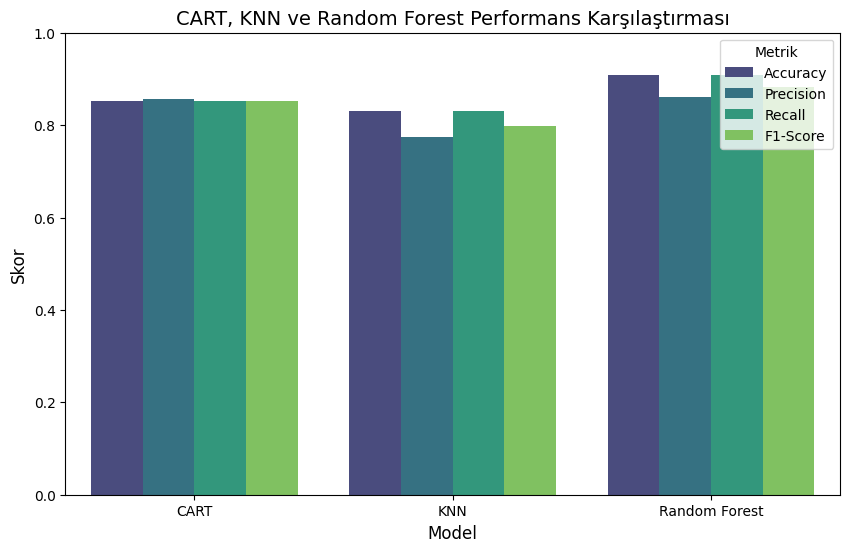

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sonuçlarla bir DataFrame oluştur
data = {
    'Model': ['CART', 'KNN', 'Random Forest'],
    'Accuracy': [0.8518518518518519, 0.8310185185185185, 0.9074074074074074],
    'Precision': [0.8575798520651461, 0.7743202210742218, 0.8614692814447716],
    'Recall': [0.8518518518518519, 0.8310185185185185, 0.9074074074074074],
    'F1-Score': [0.8529526477764539, 0.798555595517511, 0.8824732398208929]
}
results = pd.DataFrame(data)

# Verileri görselleştirme için uygun formata dönüştür
results_melted = results.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'], 
                             var_name='Metric', value_name='Score')

# Çubuk grafiği oluştur
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='viridis')
plt.title('CART, KNN ve Random Forest Performans Karşılaştırması', fontsize=14)
plt.ylabel('Skor', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.legend(title='Metrik')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırlandır
plt.show()

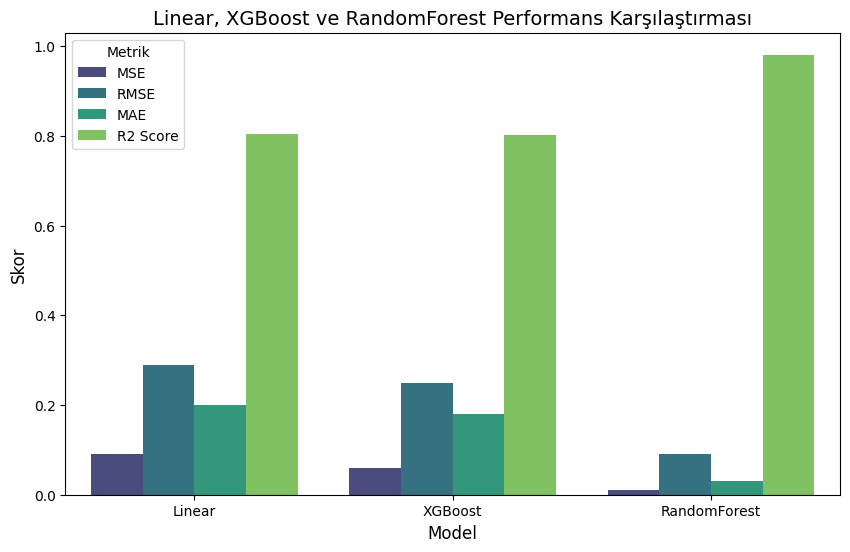

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sonuçlarla bir DataFrame oluştur
data = {
    'Model': ['Linear', 'XGBoost', 'RandomForest'],
    'MSE': [0.09, 0.06, 0.01],
    'RMSE': [0.29, 0.25, 0.09],
    'MAE': [0.20, 0.18, 0.03],
    'R2 Score': [0.8039, 0.8016, 0.9810]
}
results = pd.DataFrame(data)

# Verileri görselleştirme için uygun formata dönüştür
results_melted = results.melt(id_vars='Model', value_vars=['MSE', 'RMSE', 'MAE', 'R2 Score'], 
                             var_name='Metric', value_name='Score')

# Çubuk grafiği oluştur
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='viridis')
plt.title('Linear, XGBoost ve RandomForest Performans Karşılaştırması', fontsize=14)
plt.ylabel('Skor', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.legend(title='Metrik')
plt.show()

# RandomForest ile XGBoost  algoritması arasındaki farklar :

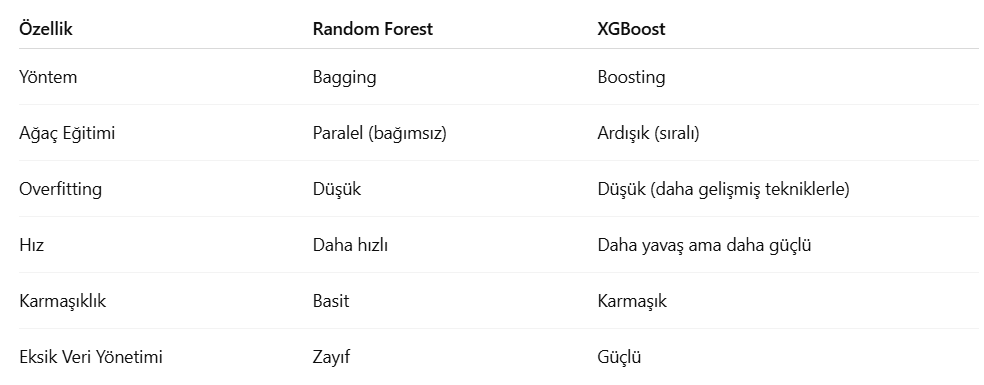